In [1]:
import pandas as pd
import matplotlib as plt 
import numpy as np
import json
from datetime import date
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from pandas.plotting import lag_plot
#Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import quandl
import functools
import seaborn as sns
#!pip install plotnine
import plotnine as p9
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import requests
import quandl
import functools
import re
import calendar
import optuna
from optuna.trial import Trial
optuna.logging.set_verbosity(optuna.logging.FATAL)
import warnings
warnings.filterwarnings("ignore")
from functools import partial
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
#import nasdaqdatalink
CSS = """
.output {
    flex-direction: row;
}
"""
import statsmodels
import statsmodels.formula.api as sm
HTML('<style>{}</style>'.format(CSS))
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as sm
#Libraries
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import scipy as sp
import quandl
import functools
import seaborn as sns
#!pip install plotnine
import plotnine as p9
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import requests
import quandl
import functools
import re
import calendar
#import statsmodels as sm
#import nasdaqdatalink
CSS = """
.output {
    flex-direction: row;
}
"""
import pylab as pl
import warnings
warnings.filterwarnings('ignore')
HTML('<style>{}</style>'.format(CSS))
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler
from statsmodels.tsa.stattools import adfuller

    
def display_corr(df,list_maxmin=True):
    
    corrmat = df.corr()
    #ignore self-correlation
    corrmat[corrmat==1] = None
    sns.heatmap(corrmat)

    if list_maxmin:
        corr_rank = corrmat.unstack().sort_values().dropna()
        pair_max = corr_rank.index[-1]
        pair_min = corr_rank.index[0]

        print(f'MIN Correlation pair is {pair_min}')
        print(f'MAX Correlation pair is {pair_max}')
        
#Functions
#XBI-PBE
def rr(data, maxDD = False):

    data_desc = data.describe().loc[['mean','std']]

    # data_desc.loc['Mean'] = data_desc.loc['mean'] # Unannualize
    # data_desc.loc['Standard Deviation'] = data_desc.loc['std']# Unannualize
    data_desc=data_desc.rename(columns={'mean':'Mean','std':'Standard Deviation'})
   # report['Max']=df.max()
    #report['Min']=df.min()
    data_desc.loc['Sharpe'] = data_desc.loc['mean'] / data_desc.loc['std']
    data_desc.loc['Minimum'] = np.min(data)
    data_desc.loc['Maximum'] = np.max(data)
    data_desc.loc['Median'] = data.median()
    data_desc.loc['Skewness'] = data.skew()
    data_desc.loc['Excess Kurtosis'] = data.kurt()
    data_desc.loc['5 %ile'] = data.quantile(0.05)
    data_desc.loc['10 %ile'] = data.quantile(0.10)
    data_desc.loc['90 %ile'] = data.quantile(0.90)
    data_desc.loc['95 %ile'] = data.quantile(0.95)
    data_desc.loc['Expected Value 5 %ile'] = data[data < data.quantile(0.05)].mean()
    data_desc.loc['Expected Value 10 %ile'] = data[data < data.quantile(0.10)].mean()
    data_desc.loc['Expected Value 90 %ile'] = data[data < data.quantile(0.90)].mean()
    data_desc.loc['Expected Value 95 %ile'] = data[data < data.quantile(0.95)].mean()
  
    def getMaxDDInfo(data):
        cumRet = (1+data).cumprod()
        cumMax = cumRet.cummax()
        dd = (cumRet/cumMax)-1
        # print(dd.min())
        
        maxDD = pd.DataFrame([tuple(dd.min())],
                            columns=data.columns,
                            index=['maxDrawdown'])

        maxDD_dt = []
        # loop through each column in dd (drawdown DataFrame)
        for col,val in dd.iteritems():
            mdd = maxDD[col]['maxDrawdown']
            
            troughDate = val[val==mdd].index[0].strftime("%Y-%m-%d")
            peakDate = val[:troughDate].iloc[::-1].idxmax().strftime("%Y-%m-%d")
            recoveryDate = val[troughDate:].idxmax().strftime("%Y-%m-%d")

            maxDD_dt.append([peakDate,troughDate,recoveryDate])

        maxDD_dt = pd.DataFrame(list(zip(*maxDD_dt)), #transpose: [[1,2],[3,4]] -> [[1,3],[2,4]]
                                columns=data.columns,
                                index=['maxDrawdown_peakDate','maxDrawdown_troughDate','maxDrawdown_recoveryDate'])
        
        return pd.concat([maxDD,maxDD_dt])
    
    if maxDD:
        return pd.concat([data_desc,getMaxDDInfo(data)]).transpose()
    else:
        return data_desc.transpose()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn
pd.set_option('use_inf_as_na', True)
from collections import Counter
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random

# Build a model by implementing define-by-run design from Optuna

In [2]:
df=pd.read_csv('Microchip.gz',compression='gzip')

In [3]:
oneday=df.set_index('ticker').loc['AMD',:].set_index('date')
X=oneday.loc[oneday.index.values[0],'days'].values
Y=oneday.loc[oneday.index.values[0],'strike_price'].values
Z=oneday.loc[oneday.index.values[0],'impl_volatility'].fillna(0).values

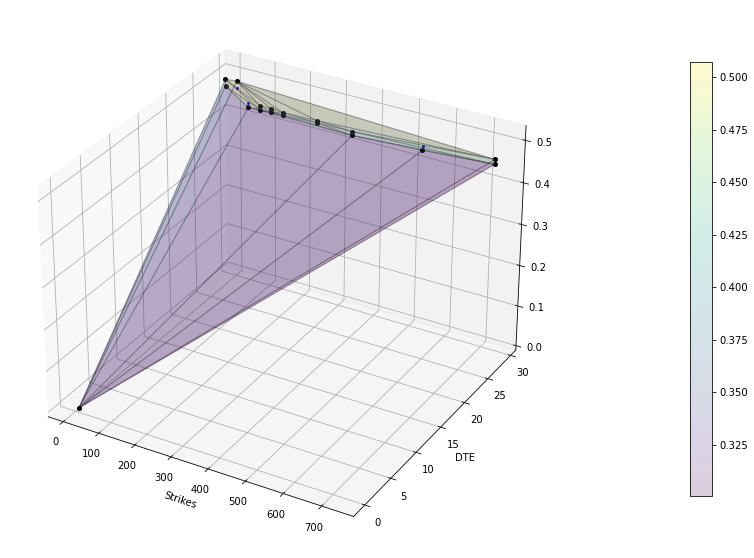

In [4]:
fig = plt.figure(figsize=(50,10))
ax = plt.axes(projection='3d')
points = np.column_stack((X, Y, Z))
hull = ConvexHull(points)
ax.plot(X, Y, Z, 'bo', ms=2)
ax.plot(points[hull.vertices, 0],
        points[hull.vertices, 1],
        points[hull.vertices, 2], 'ko', markersize=4)
s = ax.plot_trisurf(X, Y, Z, triangles=hull.simplices,
                    cmap='viridis', alpha=0.2, edgecolor='k')
plt.colorbar(s, shrink=.8)
plt.xlabel("Strikes")
plt.ylabel("DTE")
plt.show()

In [5]:
df.date=pd.to_datetime(df.date,format="%Y%m%d")
df.set_index('date',inplace=True)
call=df[df.cp_flag=="C"]
put=df[df.cp_flag=="P"]

ticker
ADI     AxesSubplot(0.125,0.2;0.775x0.68)
AMD     AxesSubplot(0.125,0.2;0.775x0.68)
AVGO    AxesSubplot(0.125,0.2;0.775x0.68)
INTC    AxesSubplot(0.125,0.2;0.775x0.68)
MCHP    AxesSubplot(0.125,0.2;0.775x0.68)
MPWR    AxesSubplot(0.125,0.2;0.775x0.68)
MU      AxesSubplot(0.125,0.2;0.775x0.68)
NVDA    AxesSubplot(0.125,0.2;0.775x0.68)
NXPI    AxesSubplot(0.125,0.2;0.775x0.68)
QCOM    AxesSubplot(0.125,0.2;0.775x0.68)
QRVO    AxesSubplot(0.125,0.2;0.775x0.68)
SWKS    AxesSubplot(0.125,0.2;0.775x0.68)
TXN     AxesSubplot(0.125,0.2;0.775x0.68)
Name: forward_price, dtype: object

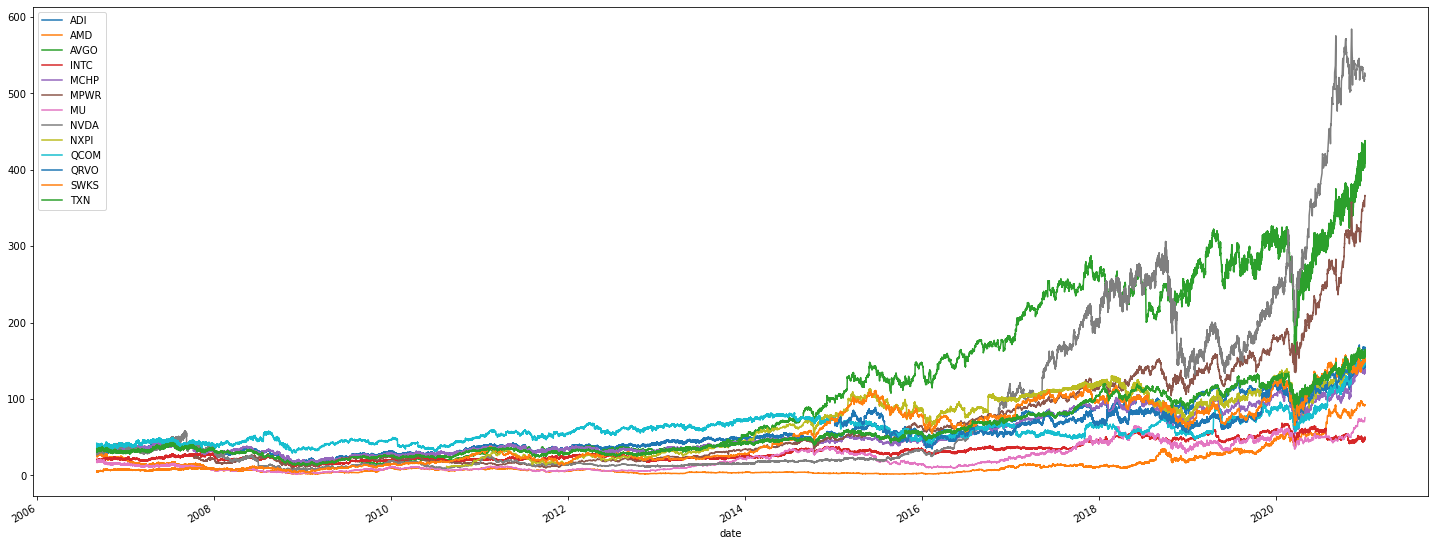

In [6]:
df.groupby('ticker').forward_price.plot(figsize=(25,10),legend=True)

In [7]:
def make_forwards(df,window):
    df=df[df.days==window]
    temp=df.groupby(['ticker','date']).forward_price.first().reset_index()
    futures=pd.DataFrame(index=df.index.unique())
    for i in df.ticker.unique():
        futures=futures.join(temp.groupby('ticker').get_group(i).set_index('date').forward_price.to_frame(i))
    return futures

In [8]:
forwards=make_forwards(df,30).fillna(0)
futures=forwards.copy()

In [9]:
window=30
for i in futures.columns.unique():
    futures[i+'SD']=futures[i].pct_change().rolling(window).std() *np.sqrt(252)
    futures[i+'1SD']=futures[i+'SD'].shift()
    for j in range(1,23):
         futures[i+str(j)+'SD']=futures[i+'1SD'].rolling(j).mean()

In [33]:
def multi_y_regression(Y,x,annual=1,model=False,year='2017'):
    fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(40,10))
    res = []
    residual_mat=pd.DataFrame(index = Y.index)
    for col in Y.columns:
        y = Y[col]*annual
        X = sm.add_constant(x*annual)
        reg = sm.OLS(y[:year], X[:year],missing='drop').fit()
        residual_mat[col] = reg.resid
        reg_stats = reg.params.to_frame(col)
        reg_stats.loc['R^2',col] = reg.rsquared
        y_actual=y[year:]
        y_hat=reg.predict(sm.add_constant(x['2018':]))
        OOSR=1-(((y_hat-y_actual)**2).sum()/((y_actual-y_actual.mean())**2).sum())
        reg_stats.loc['OOS R^2',col]=OOSR
        reg_stats.loc['Regression Residual',col]=reg.resid.mean()
        reg_stats.loc['Durbin-Watson_Score',col]=statsmodels.stats.stattools.durbin_watson(reg.resid, axis=0)
        y_hat=y_hat.to_frame('Predicted Y')
        y_hat=y_hat.join(y_actual.to_frame('Actual Y'))
        y_hat.loc[:,'Errors']=y_hat['Predicted Y']-y_hat['Actual Y']
        y_hat.loc[:,'MSE']=y_hat.Errors.apply(lambda x:x**2)
        y_hat[y_hat.columns[:2]].plot(ax=axes[0],title=col[:len(col)-2]+" Predictions")
        y_hat.Errors.to_frame('Errors').plot(ax=axes[1],legend=True,title="Error Plot")  
        y_hat.MSE.to_frame('MSE').plot(ax=axes[2],legend=True,title="Squared Errors - Non Linear Scaling")  
        plt.xlabel("Predicted Y")
        plt.ylabel("Actual Y")
        res.append(reg_stats)
    res = pd.concat(res,axis=1).T
    MAE = res['const'].abs().mean()
    res=res.astype(float).round(4)
    res.loc[:,'MSE']=y_hat.MSE.sum()/y_actual.shape[0]
    res.columns=[['Alpha','1DAY','5DAY','22DAY','HAR_Insample R^2','HAR_OOS R^2','Residual','Durbin-Watson','MSE']]
    if model==False:
        return res
    else:
        return res,reg

In [34]:
def HAR(forwards,futures,transformation="Linear"):
    har_dict={}
    if transformation=="Exponential":
        for a in forwards.columns.unique():
            if a==forwards.columns.unique()[0]:
                regres=multi_y_regression(futures.filter(regex=a+"SD").apply(lambda x:np.exp(x)),futures.filter(regex=a+'1SD|'+a+'5SD|'+a+'22SD').apply(lambda x:np.exp(x)),1,model=True)
                results=regres[0]
                har_dict[transformation+'_'+a]=regres[1]
            else:
                regres=multi_y_regression(futures.filter(regex=a+"SD").apply(lambda x:np.exp(x)),futures.filter(regex=a+'1SD|'+a+'5SD|'+a+'22SD').apply(lambda x:np.exp(x)),1,model=True)
                results=pd.concat([results,regres[0]],axis=0)
                har_dict[transformation+'_'+a]=regres[1]
        return results,har_dict
        
    if transformation=="Linear":
        for a in forwards.columns.unique():
            if a==forwards.columns.unique()[0]:
                regres=multi_y_regression(futures.filter(regex=a+"SD"),futures.filter(regex=a+'1SD|'+a+'5SD|'+a+'22SD'),1,model=True)
                results=regres[0]
                har_dict[transformation+'_'+a]=regres[1]
            else:
                regres=multi_y_regression(futures.filter(regex=a+"SD"),futures.filter(regex=a+'1SD|'+a+'5SD|'+a+'22SD'),1,model=True)
                results=pd.concat([results,regres[0]],axis=0)
                har_dict[transformation+'_'+a]=regres[1]
        return results,har_dict
    
    if transformation=="Non-Linear":
        for a in forwards.columns.unique():
            if a==forwards.columns.unique()[0]:
                regres=multi_y_regression(futures.filter(regex=a+"SD").apply(lambda x:x**2),futures.filter(regex=a+'1SD|'+a+'5SD|'+a+'22SD').apply(lambda x:x**2),1,model=True)
                results=regres[0]
                har_dict[transformation+'_'+a]=regres[1]
            else:
                regres=multi_y_regression(futures.filter(regex=a+"SD").apply(lambda x:x**2),futures.filter(regex=a+'1SD|'+a+'5SD|'+a+'22SD').apply(lambda x:x**2),1,model=True)
                results=pd.concat([results,regres[0]],axis=0)
                har_dict[transformation+'_'+a]=regres[1]
        return results,har_dict 


Alpha    1DAY    5DAY   22DAY HAR_Insample R^2 HAR_OOS R^2 Residual  \
AMDSD   0.0115  1.0495 -0.0496 -0.0207           0.9705      0.9796     -0.0   
SWKSSD  0.0060  0.9931  0.0095 -0.0160           0.9767      0.9884     -0.0   
ADISD   0.0040  0.9873  0.0387 -0.0370           0.8222      0.9927      0.0   
INTCSD  0.0025  1.0136  0.0181 -0.0413           0.9878      0.9841     -0.0   
MCHPSD  0.0035  1.0109  0.0078 -0.0320           0.9813      0.9899      0.0   
MUSD    0.0035  1.0171 -0.0004 -0.0219           0.9556      0.9820      0.0   
NVDASD  0.0068  0.9838  0.0275 -0.0269           0.9752      0.9880     -0.0   
QCOMSD  0.0047  1.0402 -0.0240 -0.0331           0.9782      0.9779     -0.0   
TXNSD   0.0029  0.9992  0.0221 -0.0328           0.9834      0.9912      0.0   
MPWRSD  0.0031  1.0330 -0.0171 -0.0245           0.9878      0.9922     -0.0   
AVGOSD  0.0075  1.0370 -0.0304 -0.0293           0.9693      0.9872     -0.0   
NXPISD  0.0039  1.0945 -0.0954 -0.0096           0.9843      0.9940     -0.0   
QRVOSD  0.0082  0.9779  0.0383 -0.0370           0.9691      0.9773     -0.0   

       Durbin-Watson       MSE  
AMDSD         1.9248  0.000719  
SWKSSD        2.0030  0.000342  
ADISD         1.9968  0.000209  
INTCSD        1.9840  0.000538  
MCHPSD        1.9848  0.000404  
MUSD          1.9816  0.000411  
NVDASD        1.9797  0.000431  
QCOMSD        1.9870  0.000724  
TXNSD         2.0122  0.000191  
MPWRSD        2.0149  0.000330  
AVGOSD        1.9879  0.000395  
NXPISD        2.0244  0.000372  
QRVOSD        1.9887  0.000663

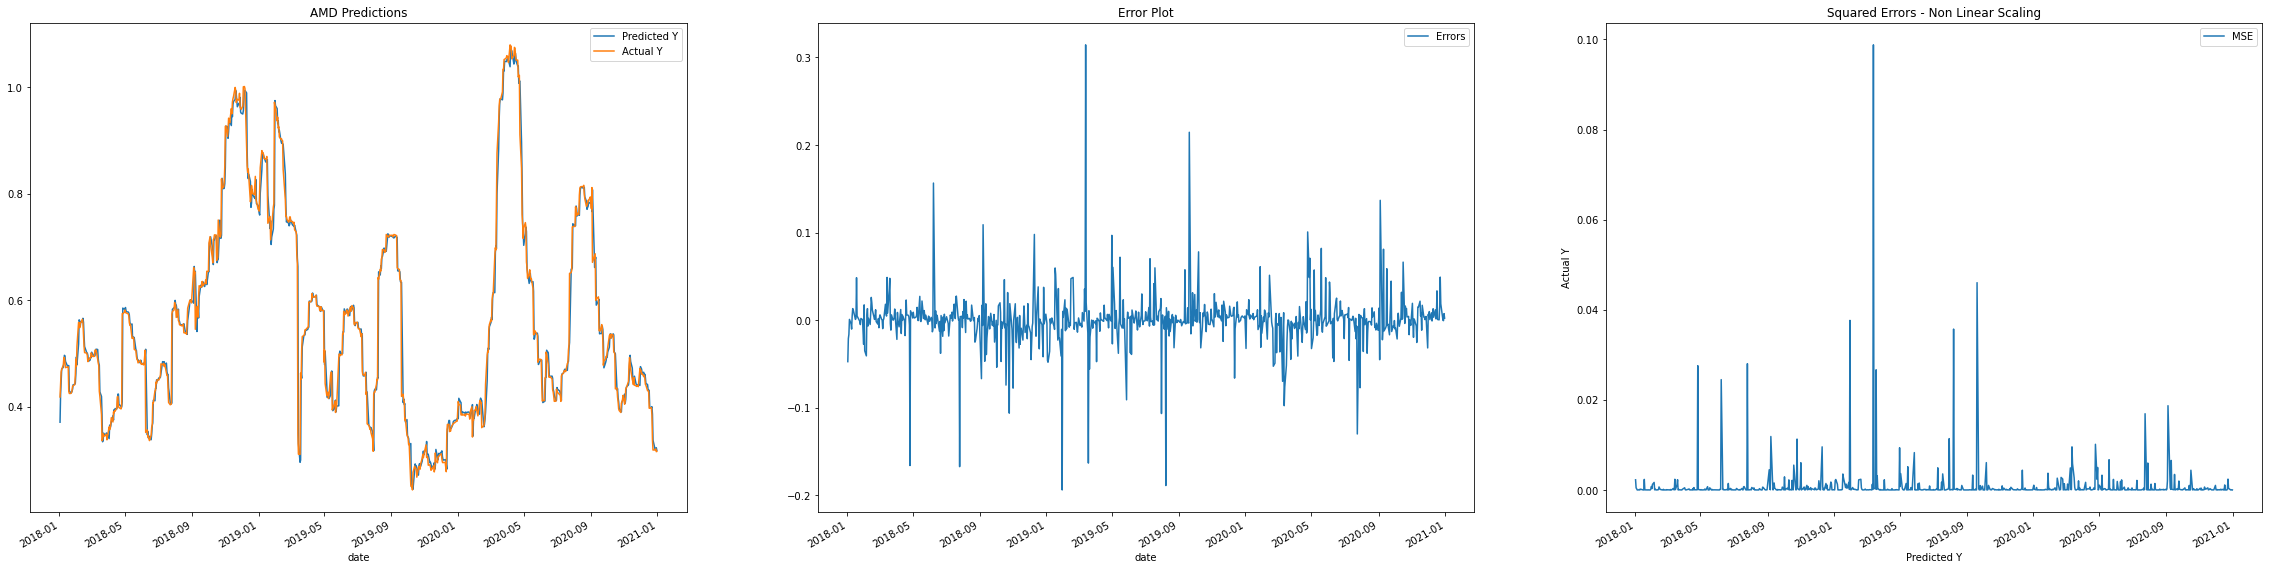

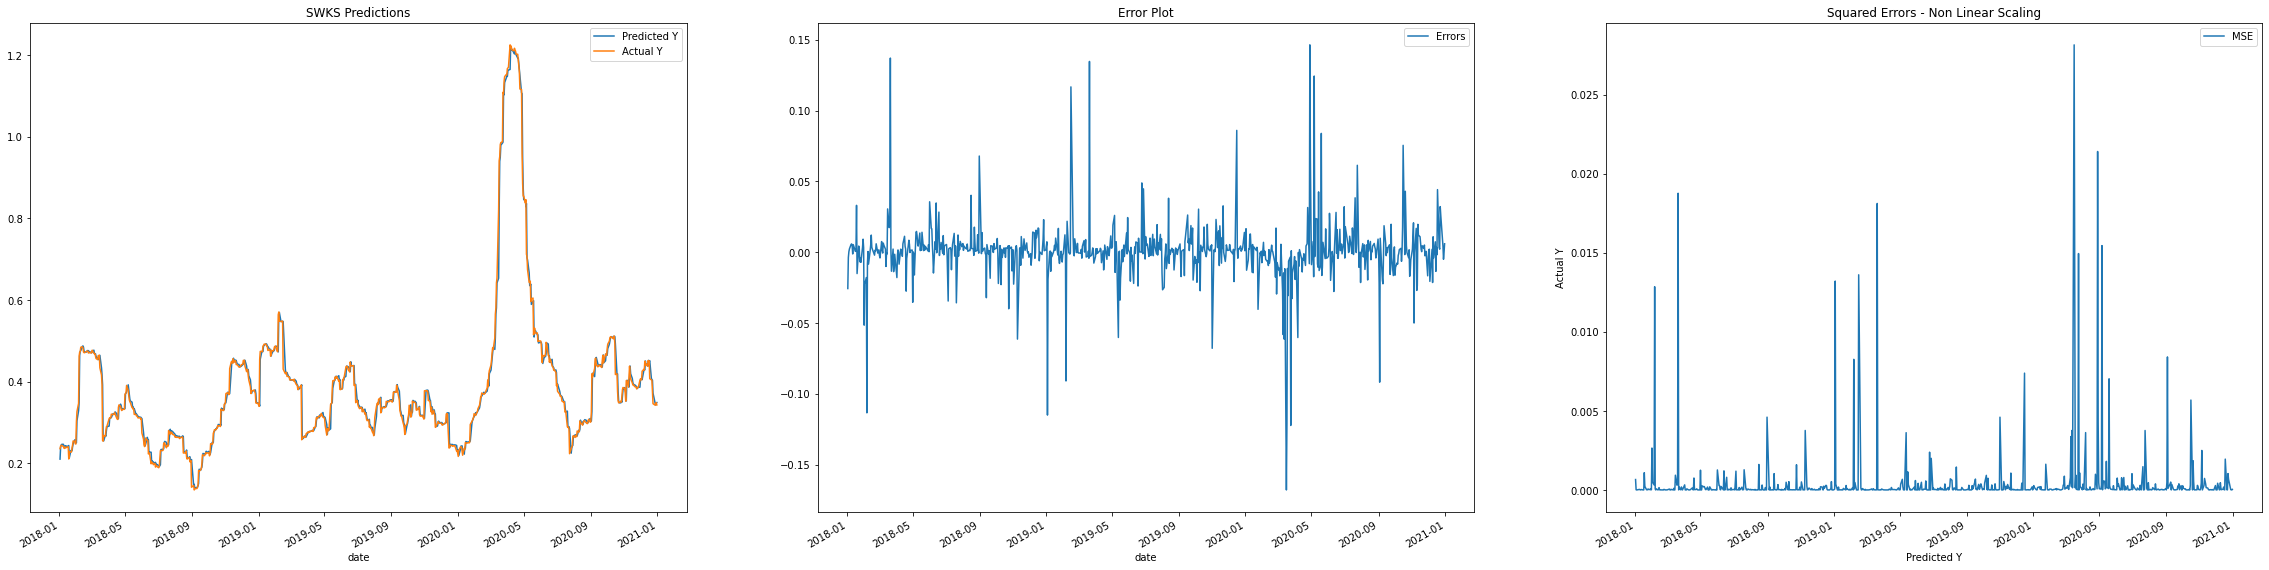

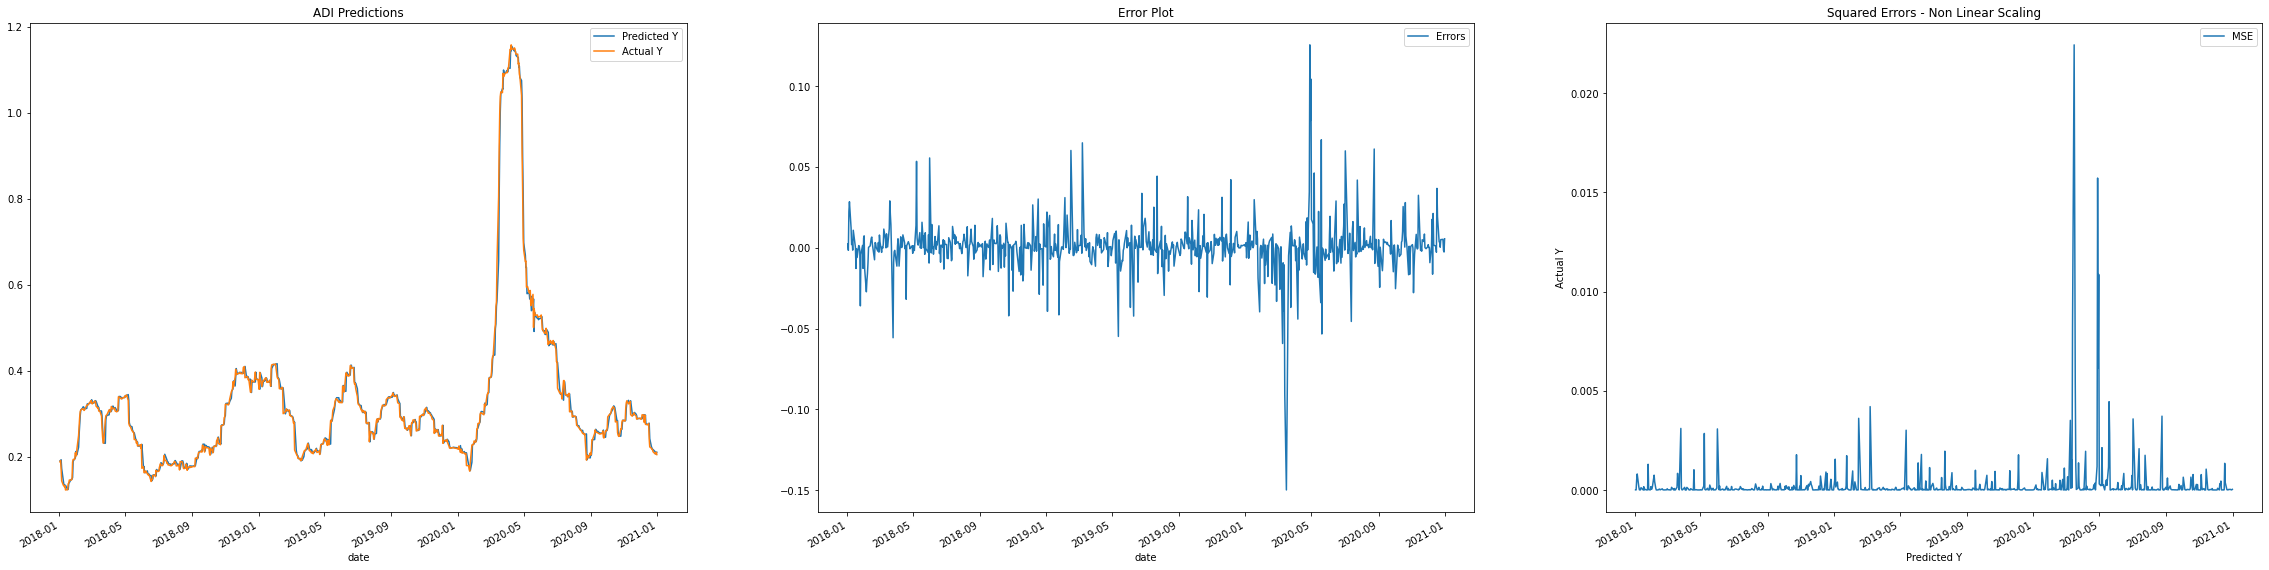

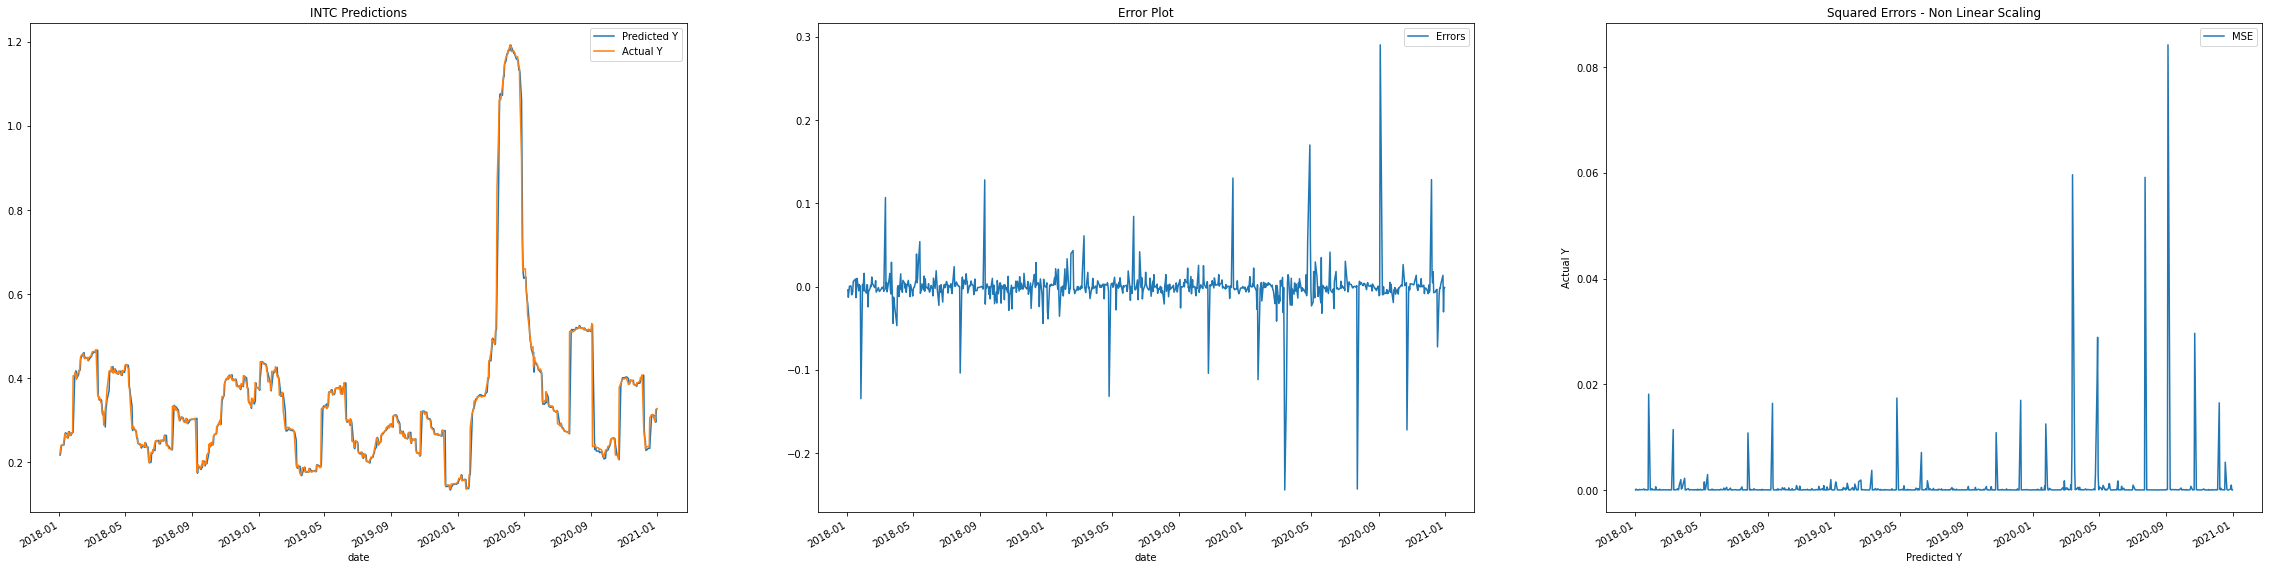

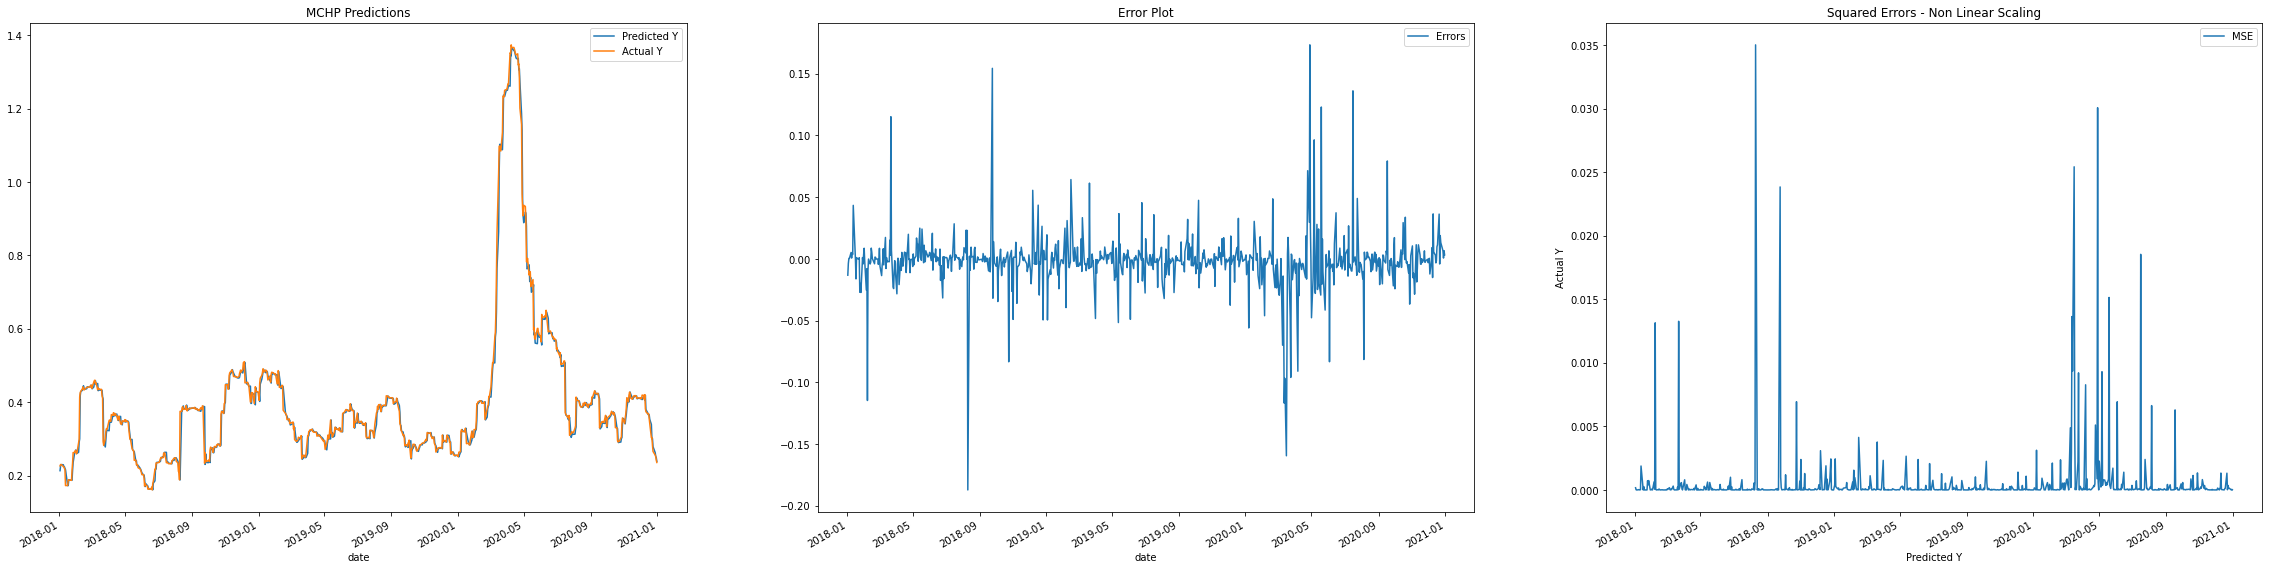

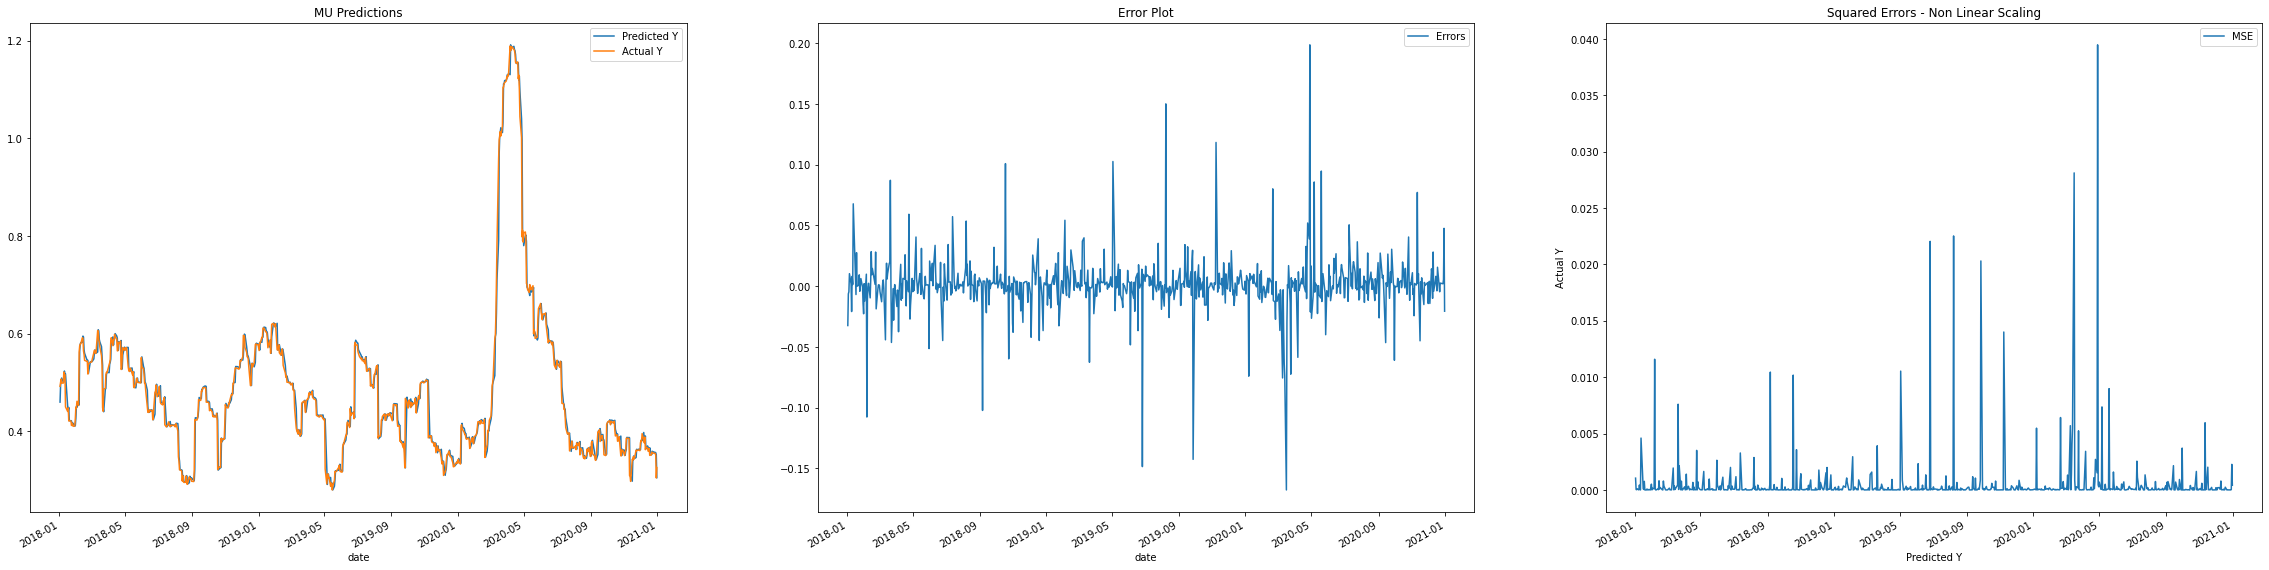

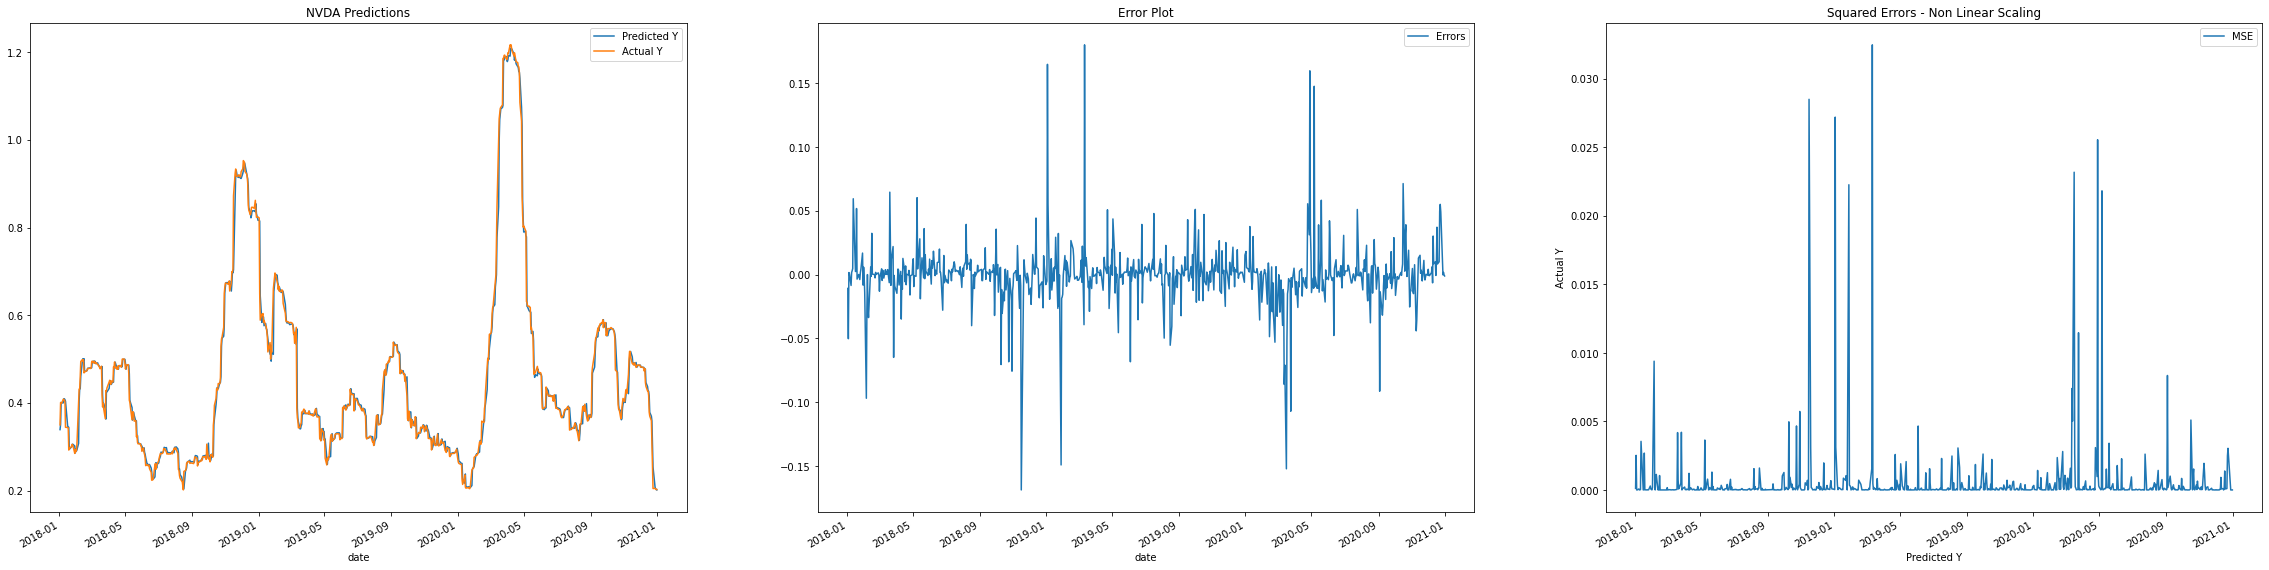

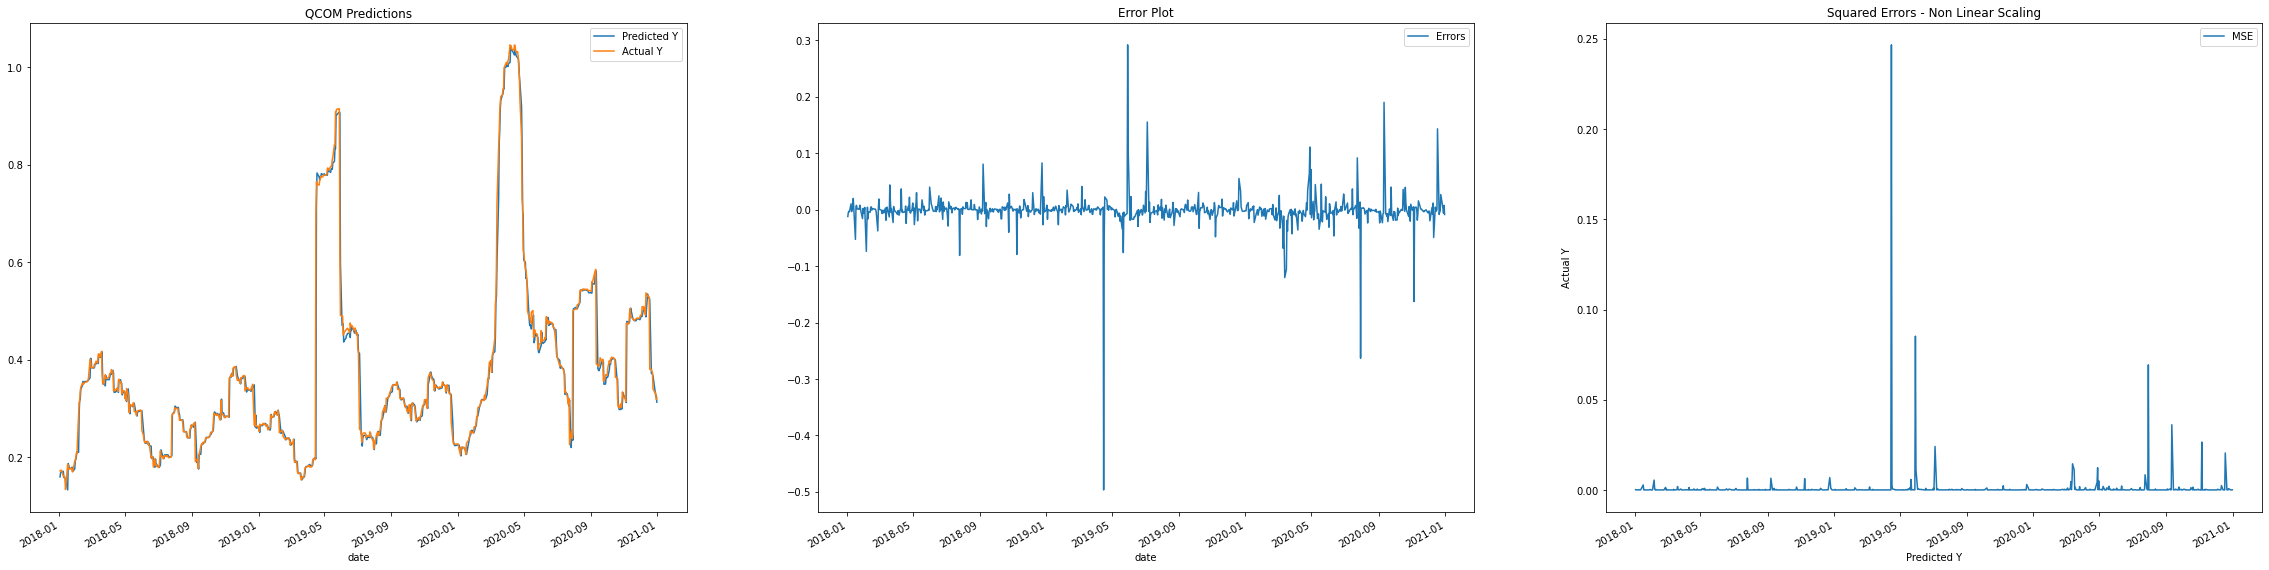

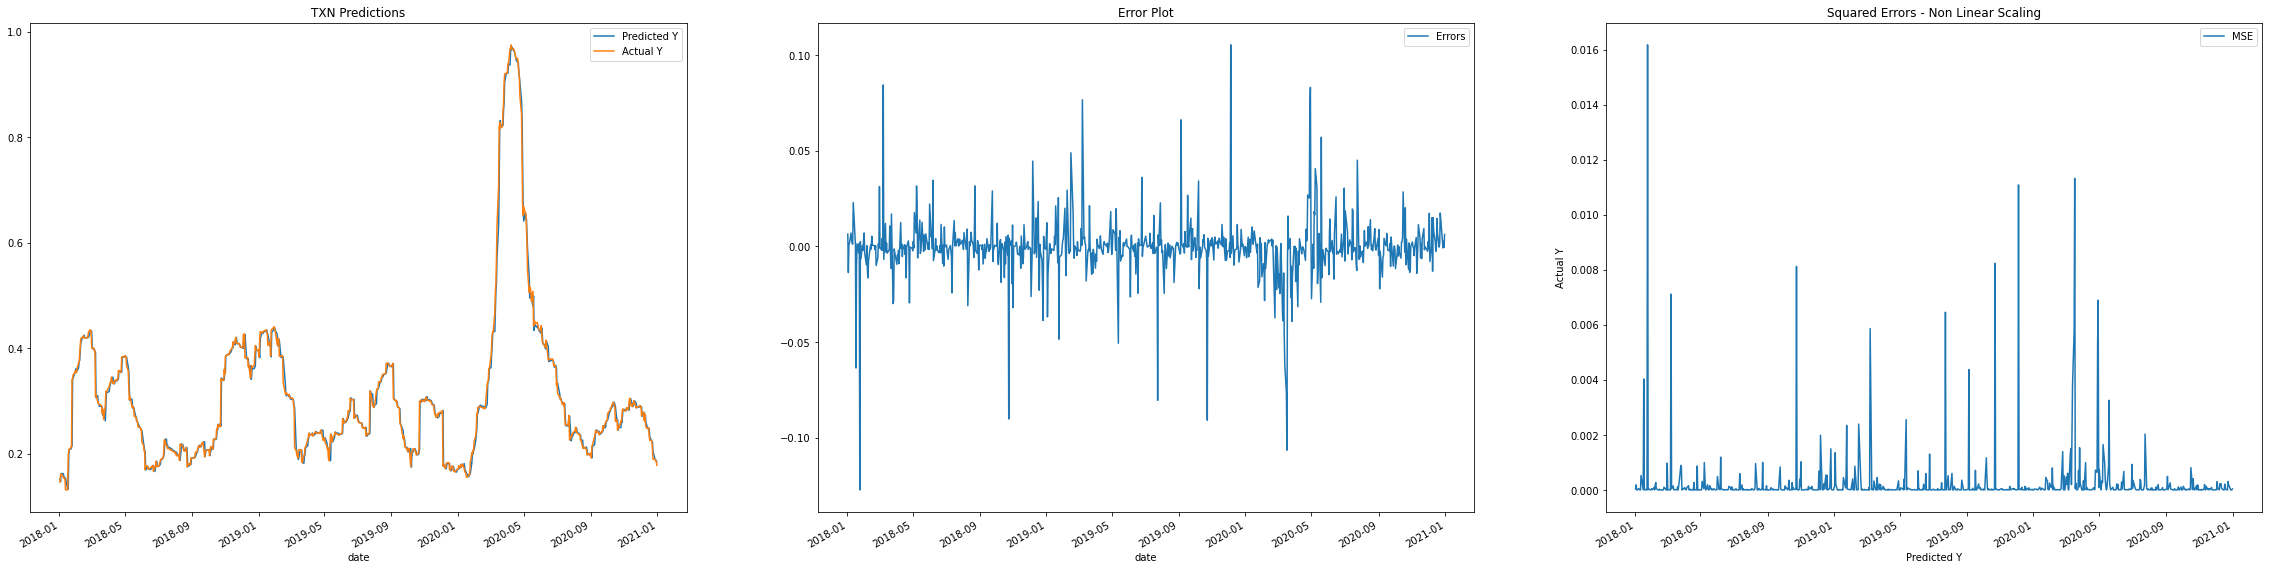

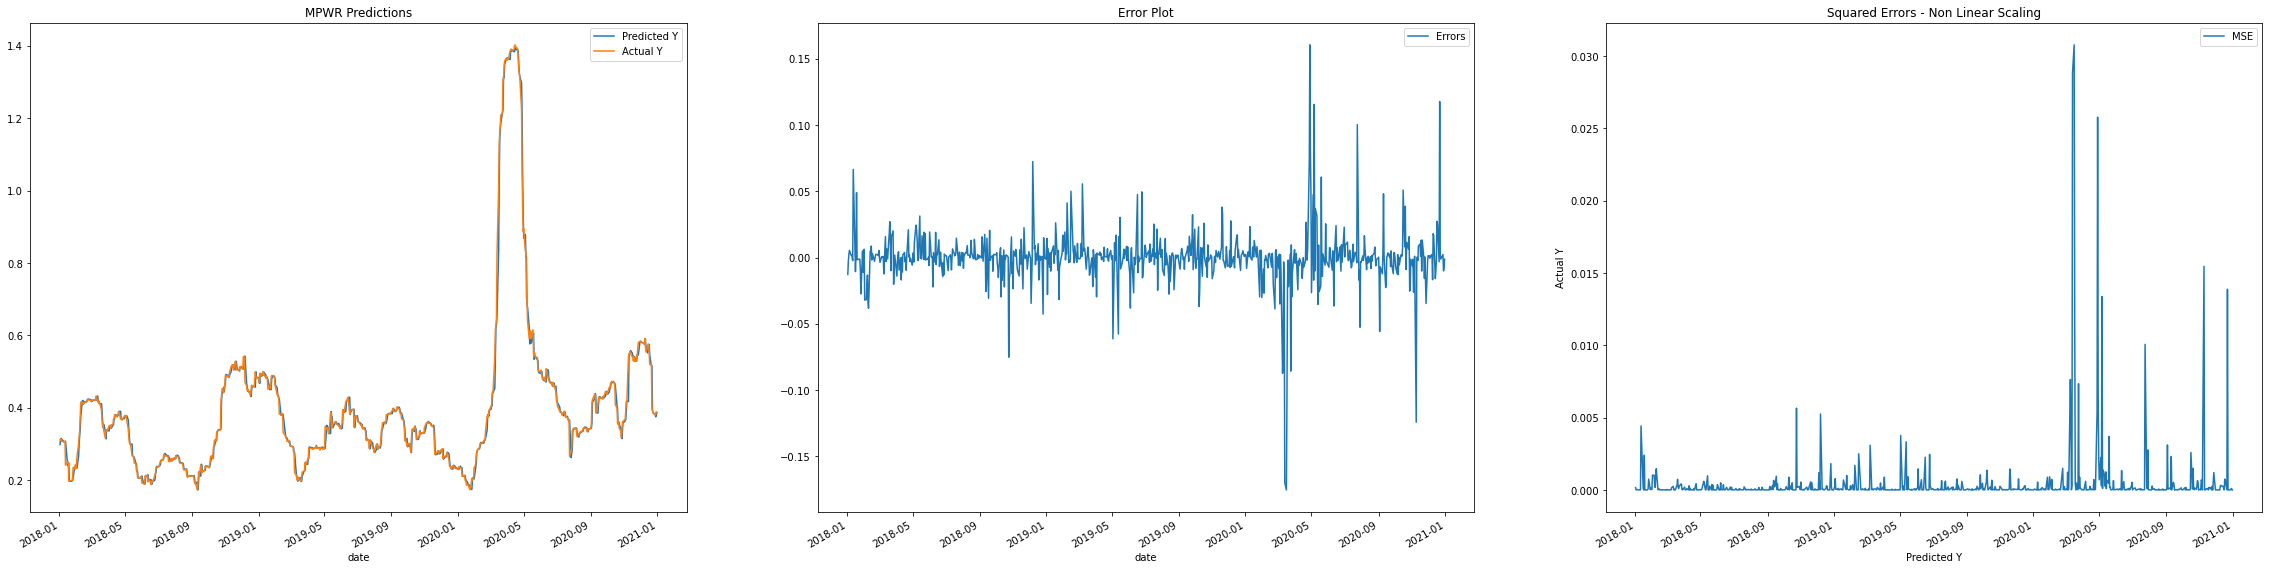

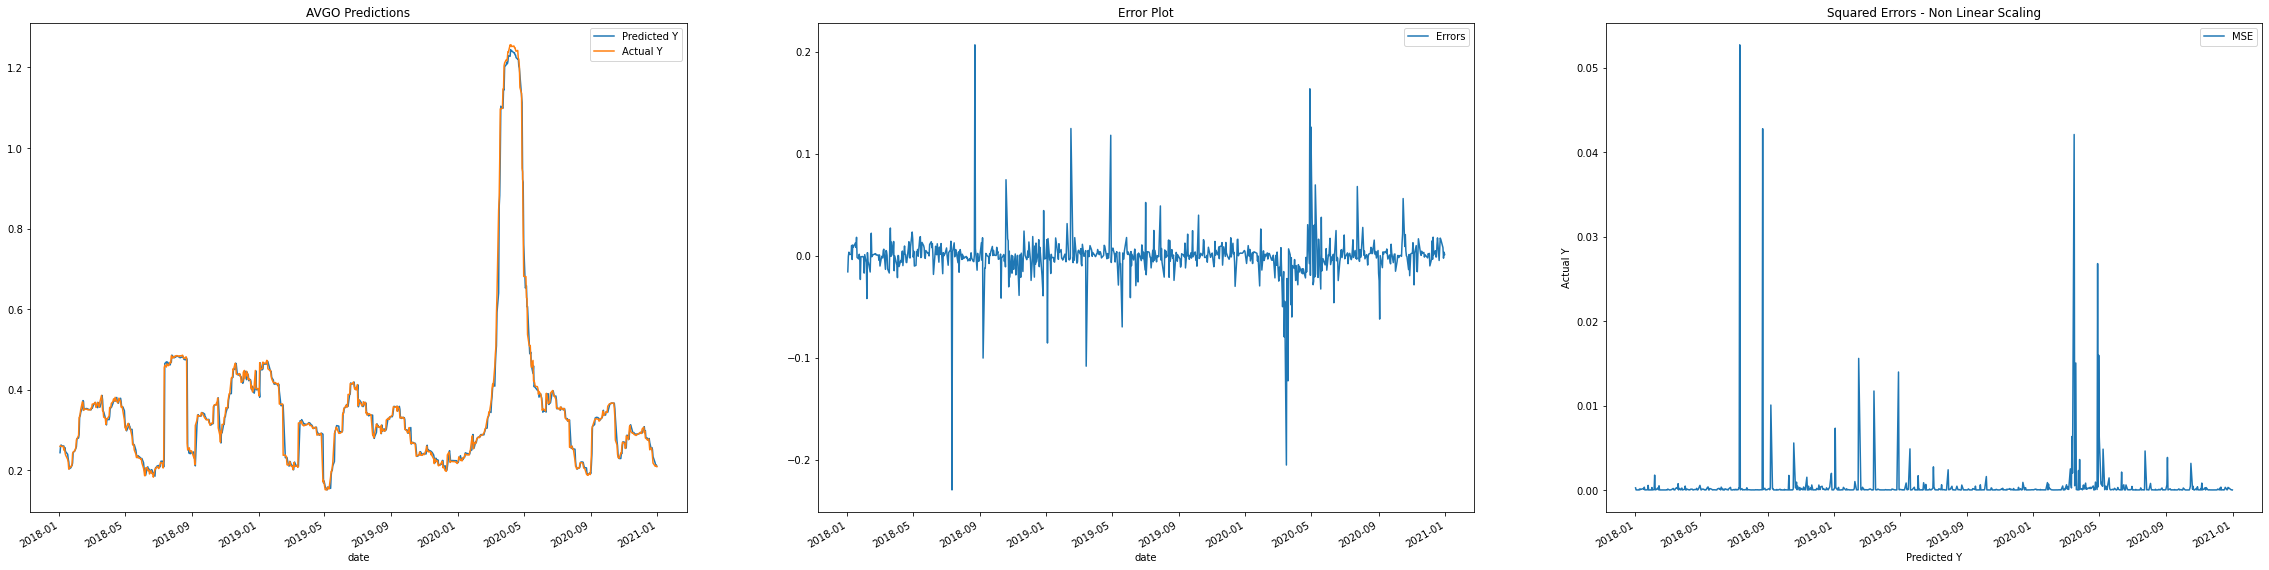

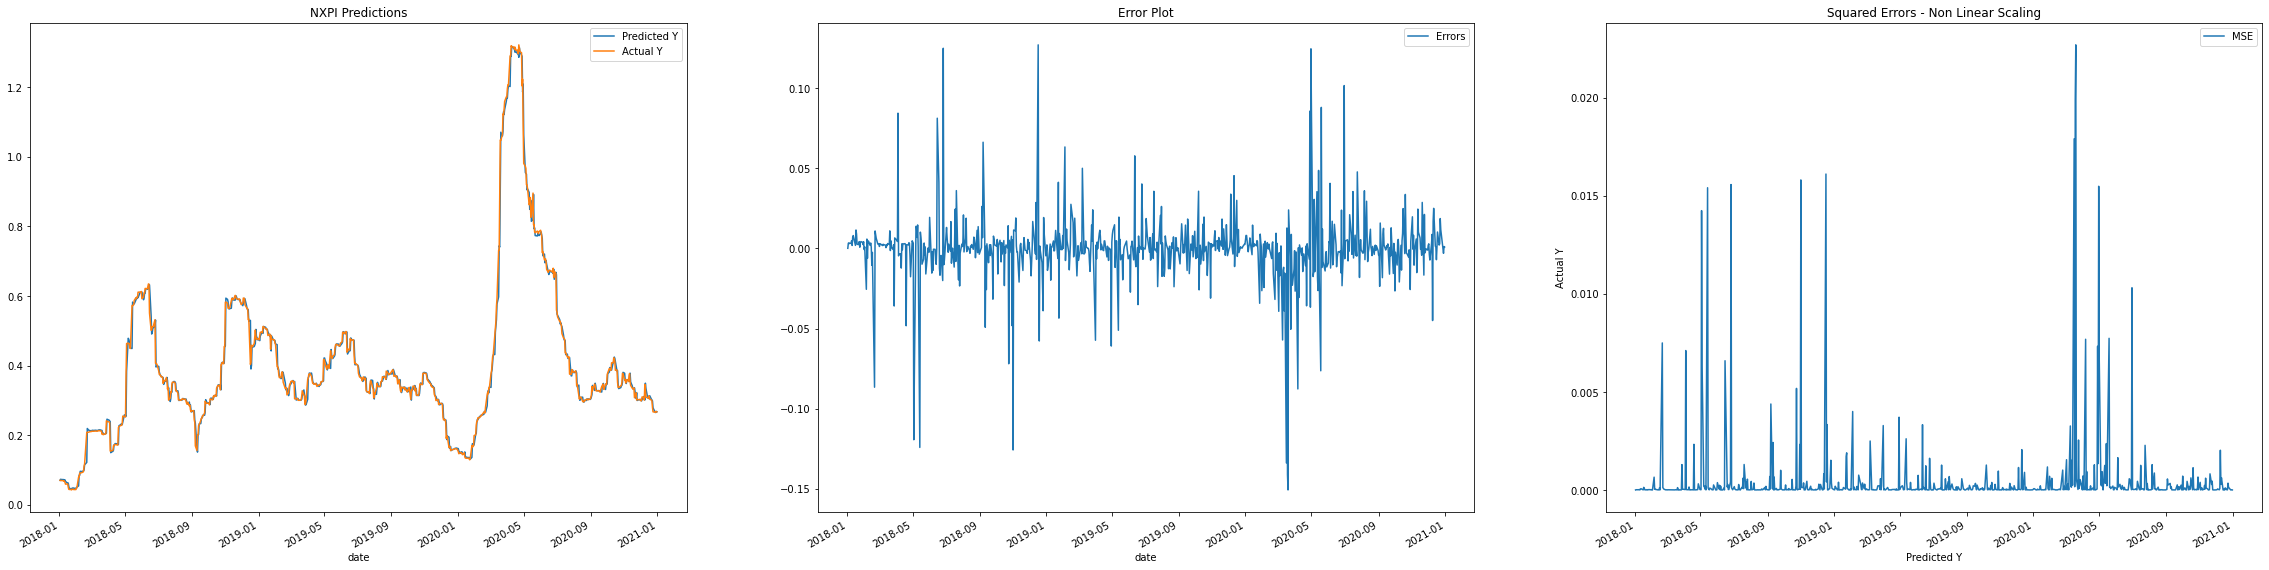

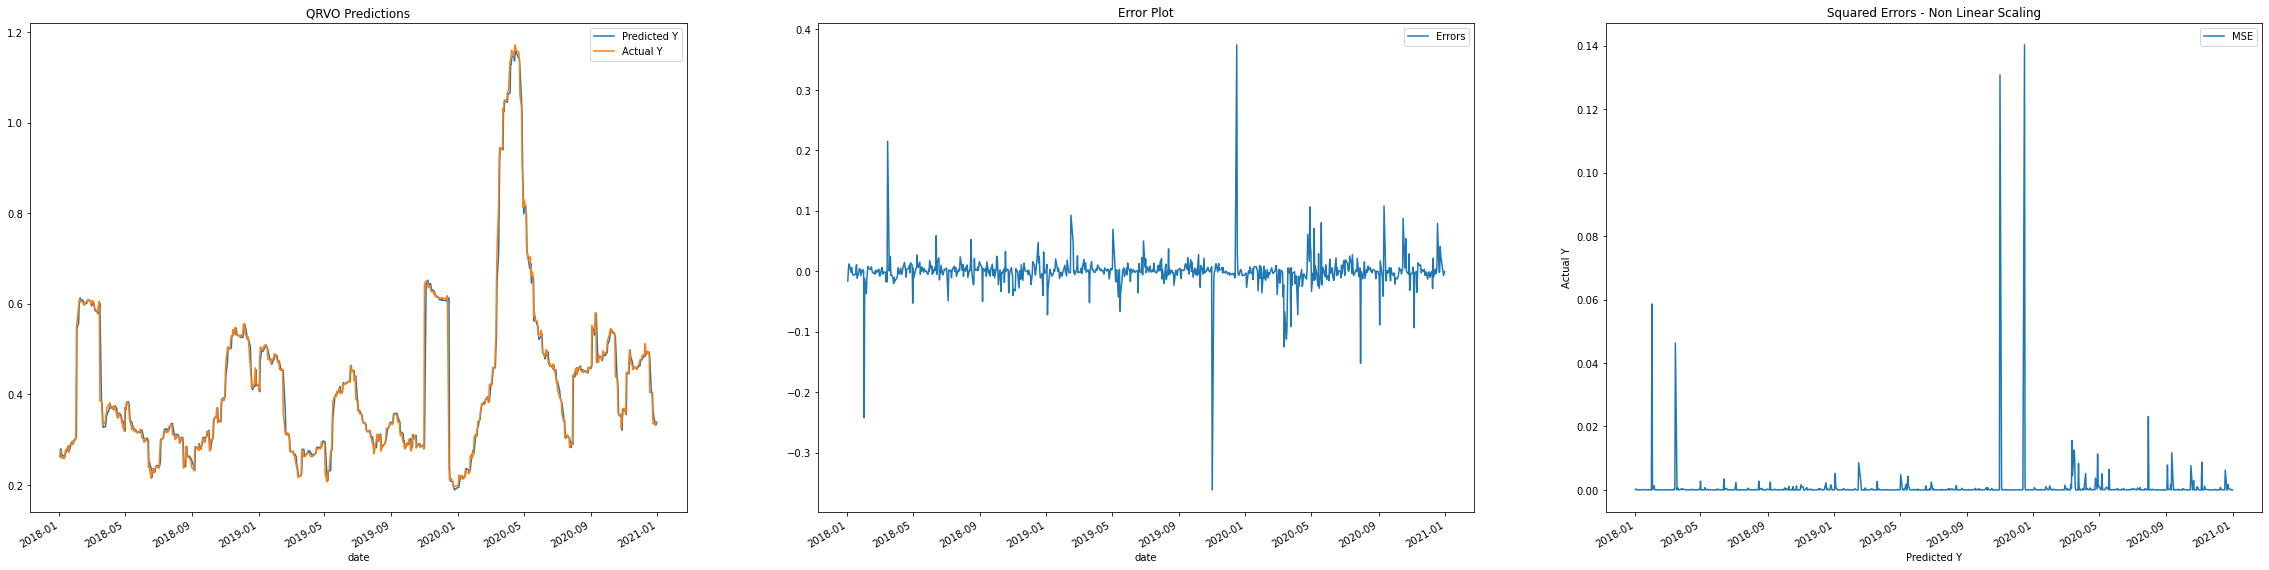

In [36]:
har1=HAR(forwards,futures,transformation="Linear")
har1_results=har1[0]
har1_results

Alpha    1DAY    5DAY   22DAY HAR_Insample R^2 HAR_OOS R^2 Residual  \
AMDSD   0.0092  1.0356 -0.0379 -0.0237           0.9639      0.9819     -0.0   
SWKSSD  0.0036  0.9873  0.0171 -0.0201           0.9744      0.9895     -0.0   
ADISD   0.0042  0.9585  0.0972 -0.0697           0.2285      0.9919     -0.0   
INTCSD  0.0008  0.9864  0.0693 -0.0659           0.9905      0.9871     -0.0   
MCHPSD  0.0009  1.0141  0.0155 -0.0413           0.9856      0.9908     -0.0   
MUSD    0.0044  1.0402 -0.0276 -0.0168           0.8402      0.9849     -0.0   
NVDASD  0.0045  0.9686  0.0474 -0.0357           0.9710      0.9881     -0.0   
QCOMSD  0.0015  0.9913  0.0438 -0.0518           0.9807      0.9784      0.0   
TXNSD   0.0008  1.0178  0.0142 -0.0427           0.9873      0.9928     -0.0   
MPWRSD  0.0012  1.0171  0.0124 -0.0376           0.9899      0.9923      0.0   
AVGOSD  0.0029  1.0437 -0.0344 -0.0346           0.9687      0.9902     -0.0   
NXPISD  0.0029  1.1061 -0.1104 -0.0120           0.9784      0.9915      0.0   
QRVOSD  0.0054  0.9438  0.0799 -0.0542           0.9591      0.9831     -0.0   

       Durbin-Watson       MSE  
AMDSD         1.9188  0.001067  
SWKSSD        2.0289  0.000500  
ADISD         2.0005  0.000329  
INTCSD        1.9520  0.000605  
MCHPSD        1.9628  0.000685  
MUSD          1.9954  0.000603  
NVDASD        1.9792  0.000714  
QCOMSD        1.9365  0.000779  
TXNSD         2.0213  0.000147  
MPWRSD        1.9350  0.000674  
AVGOSD        1.9810  0.000539  
NXPISD        2.1436  0.000656  
QRVOSD        2.0143  0.000697

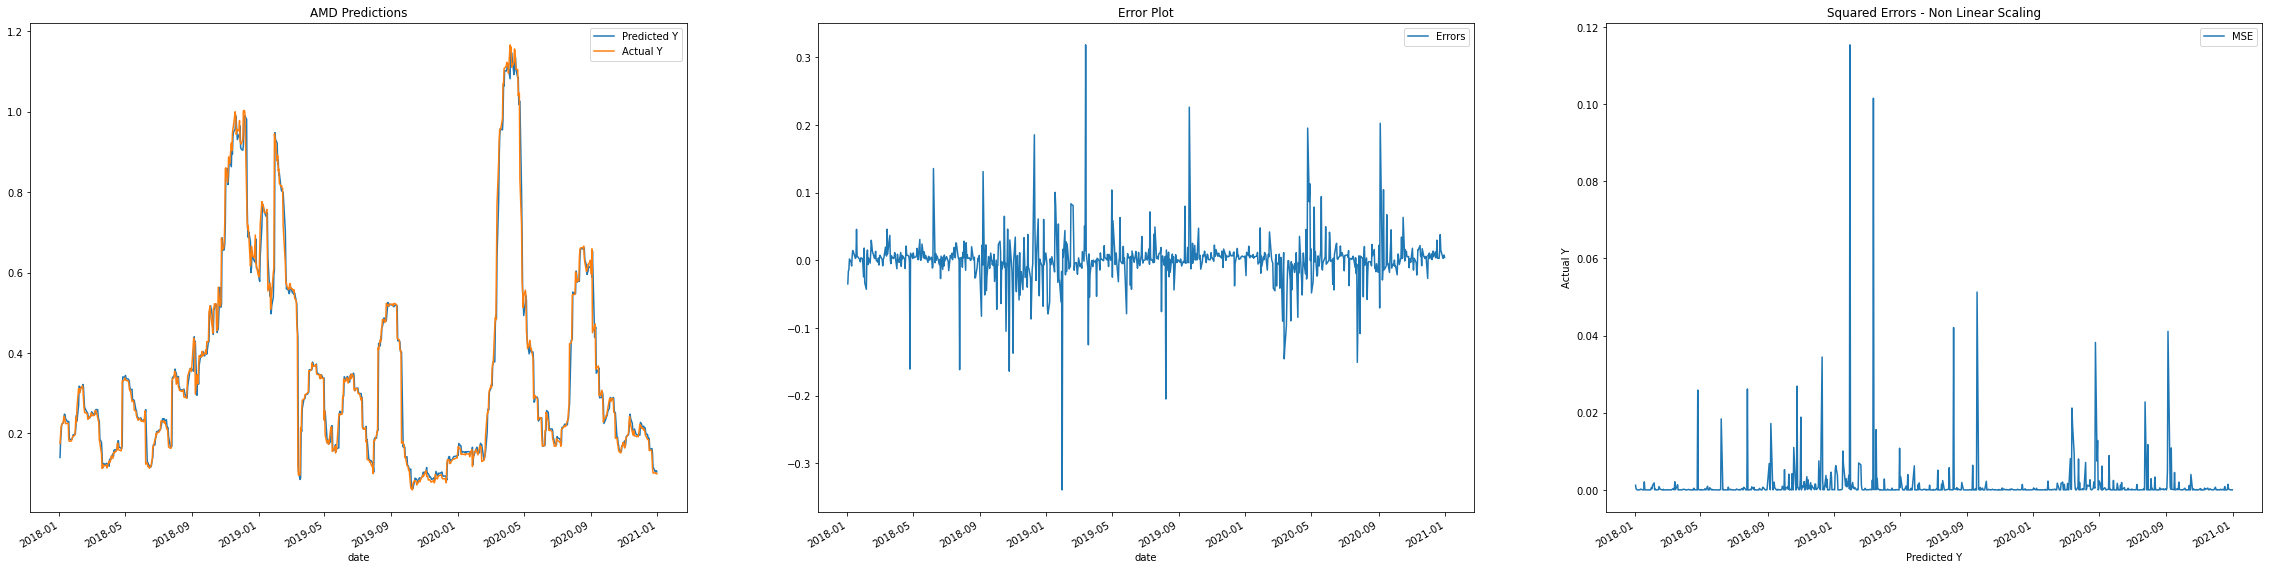

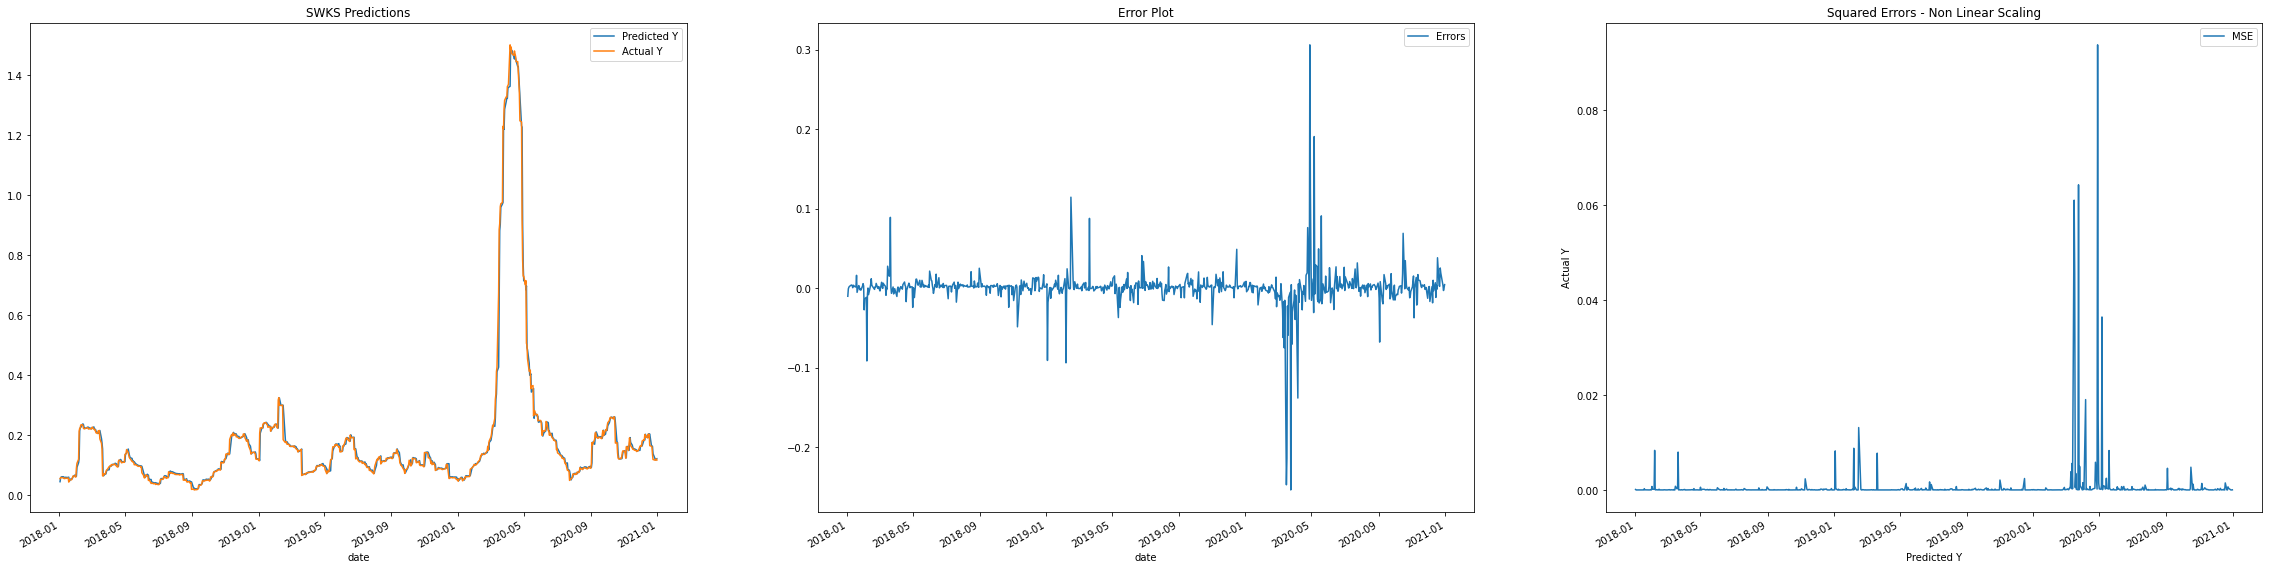

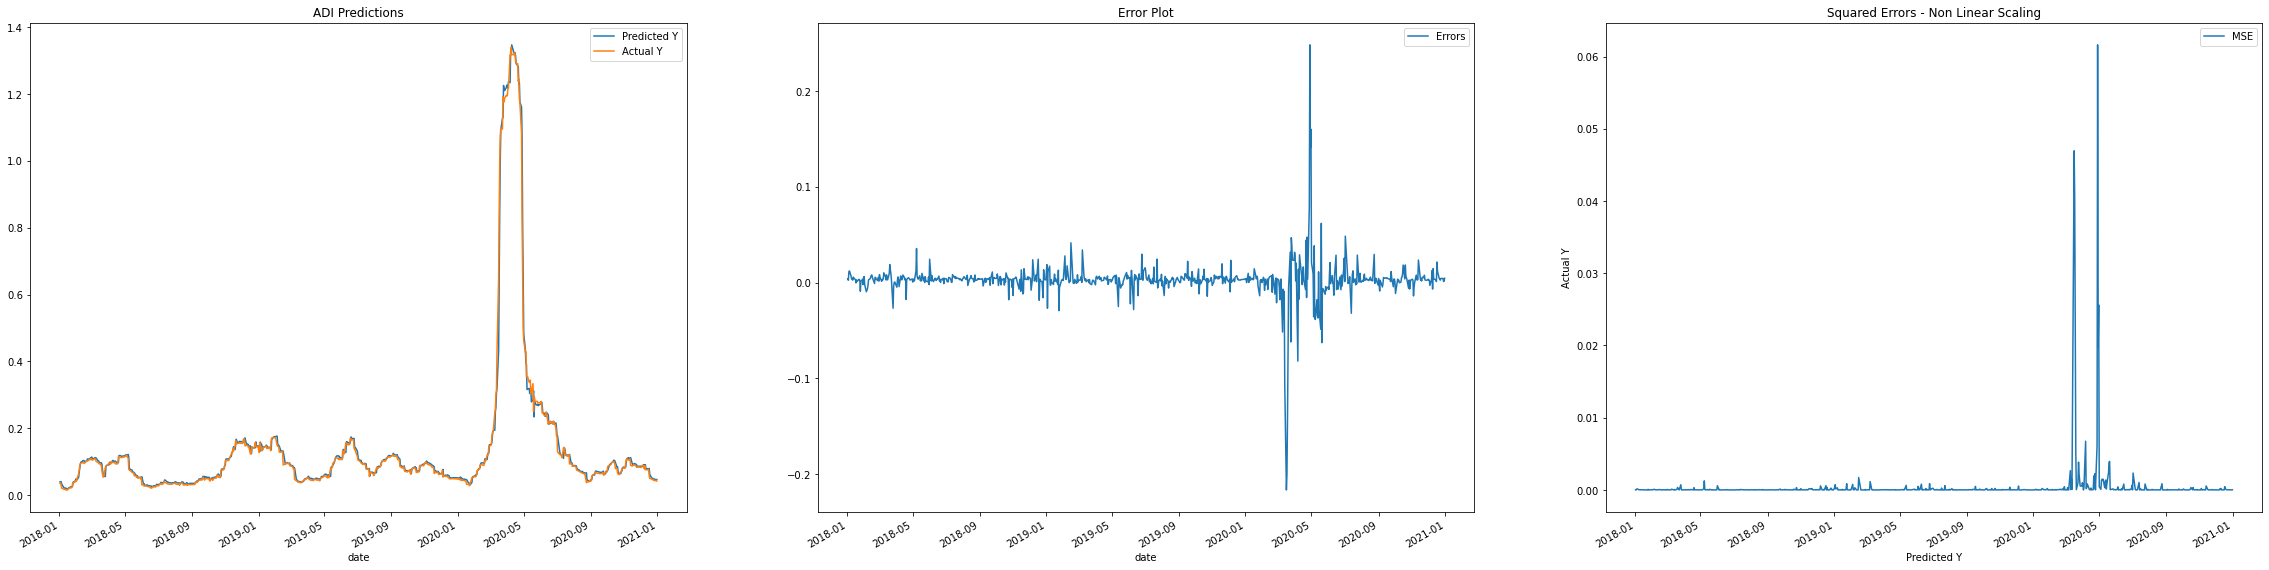

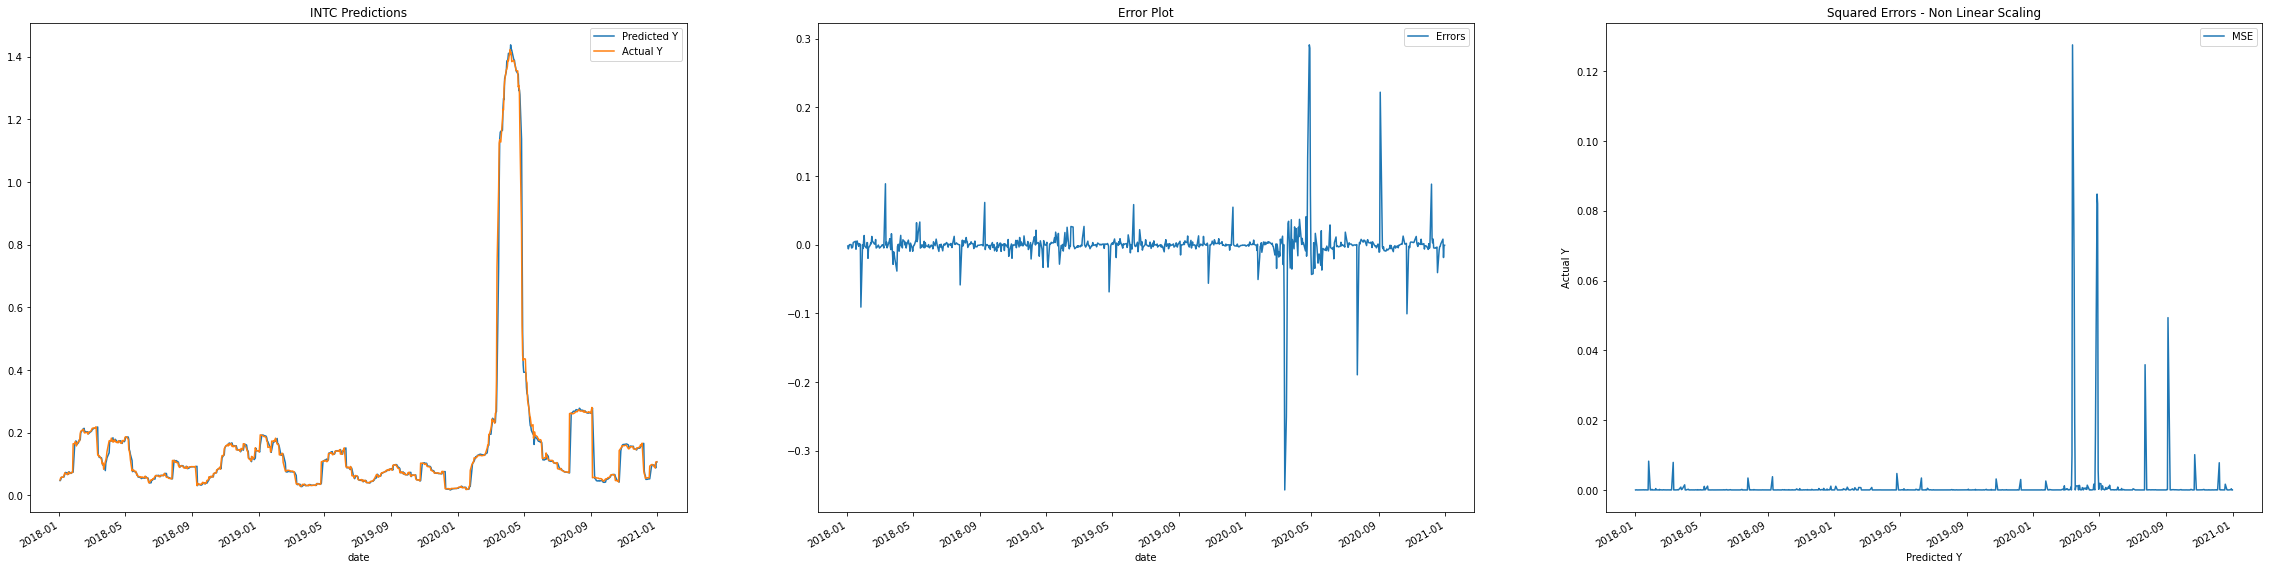

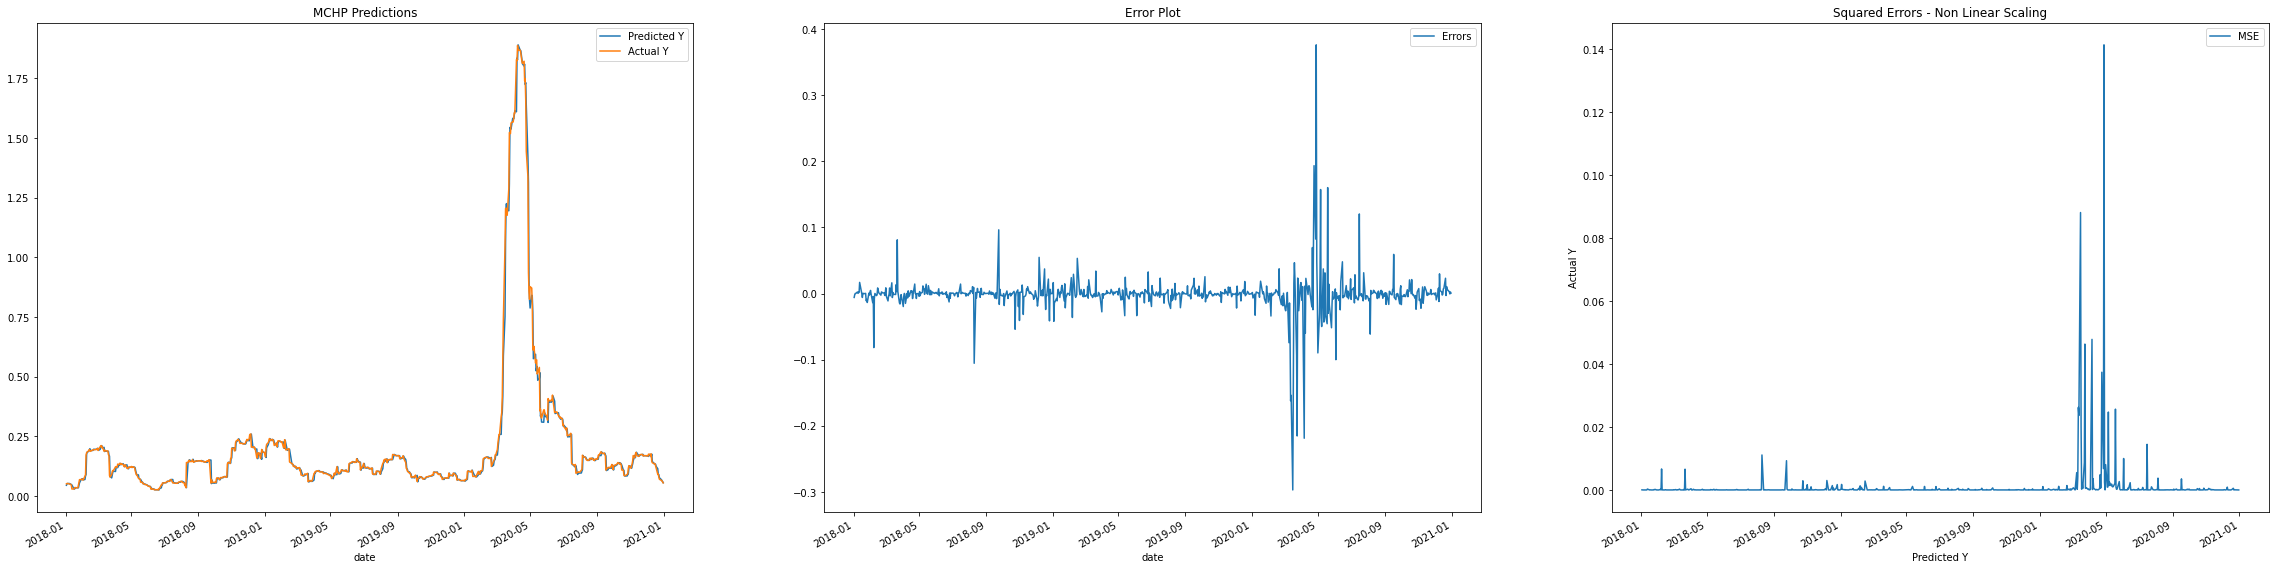

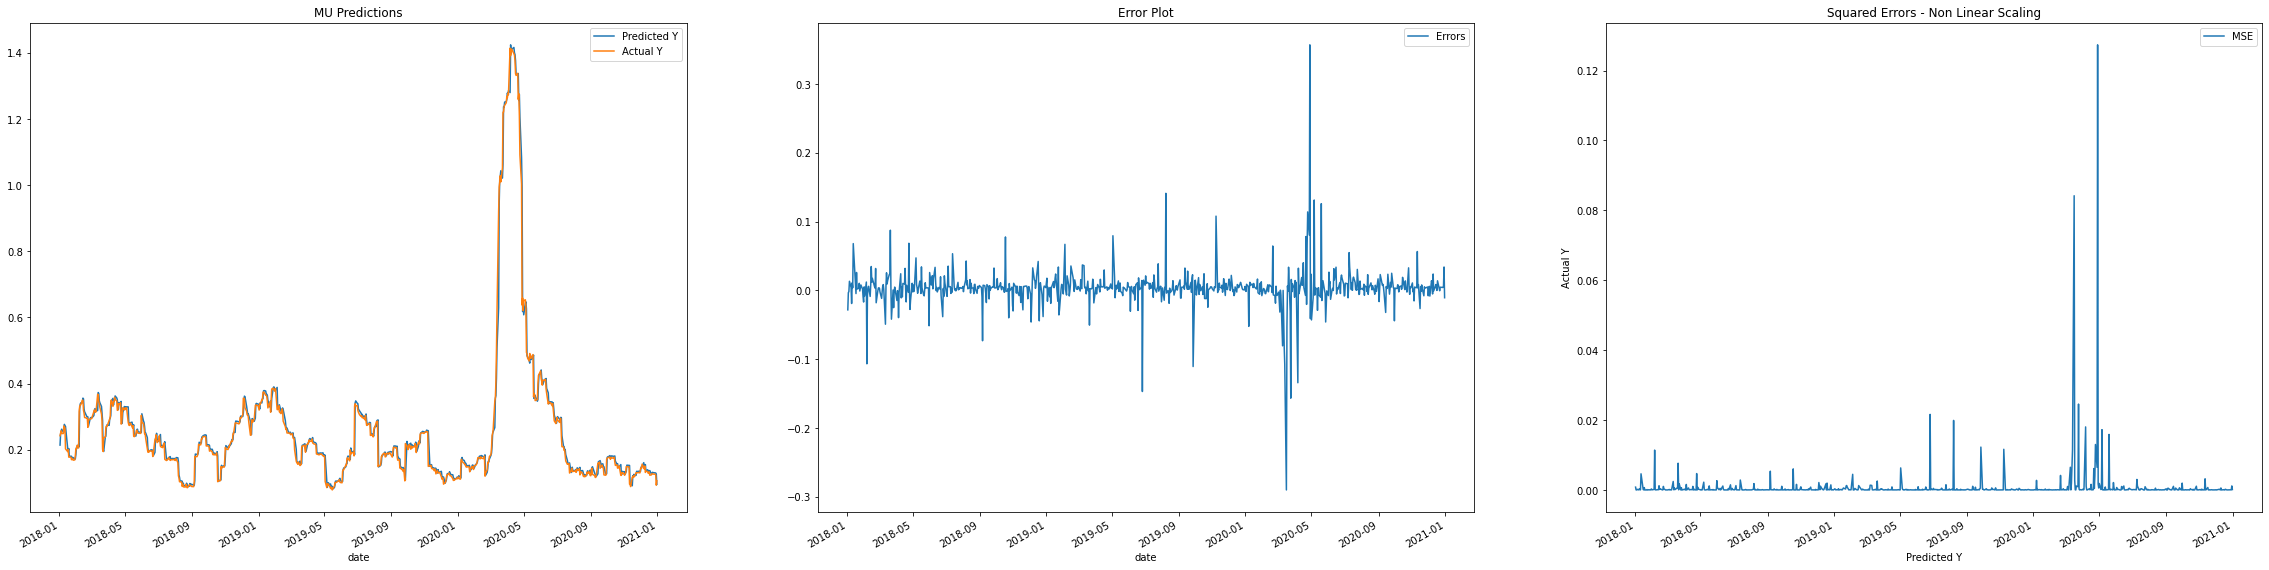

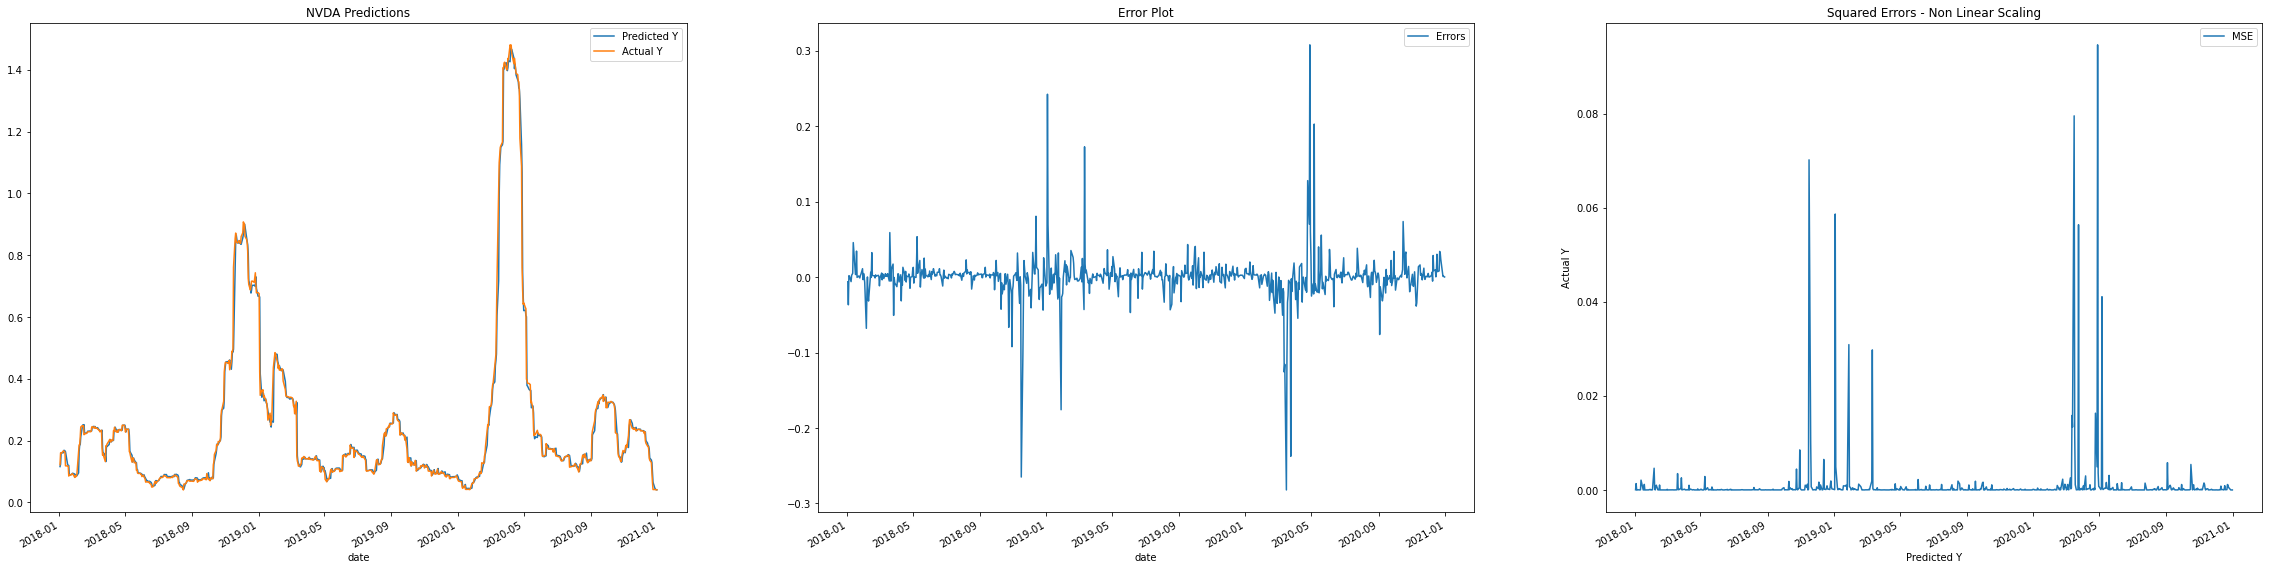

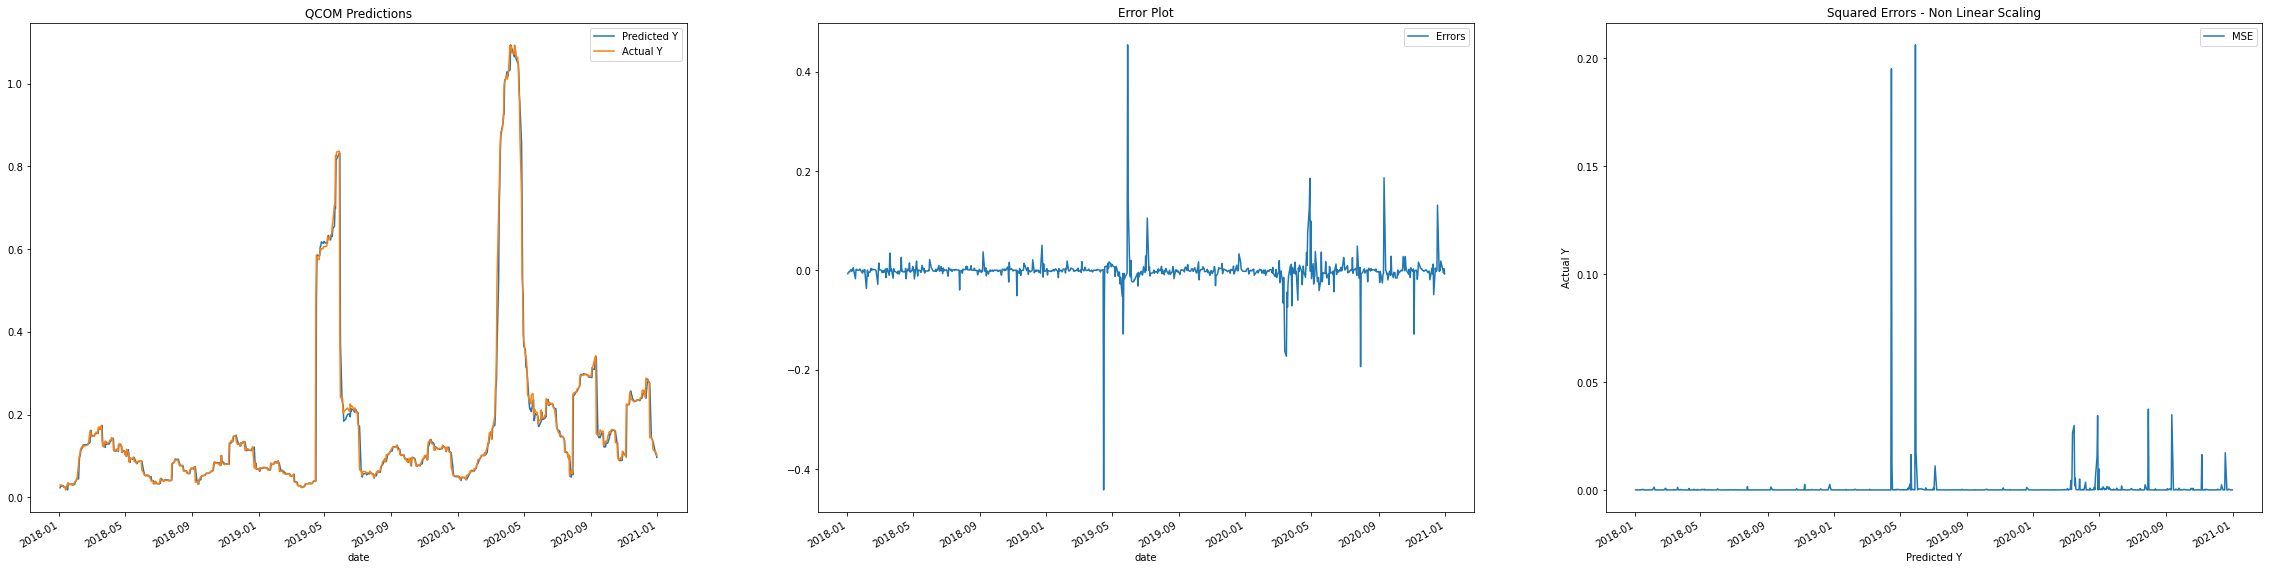

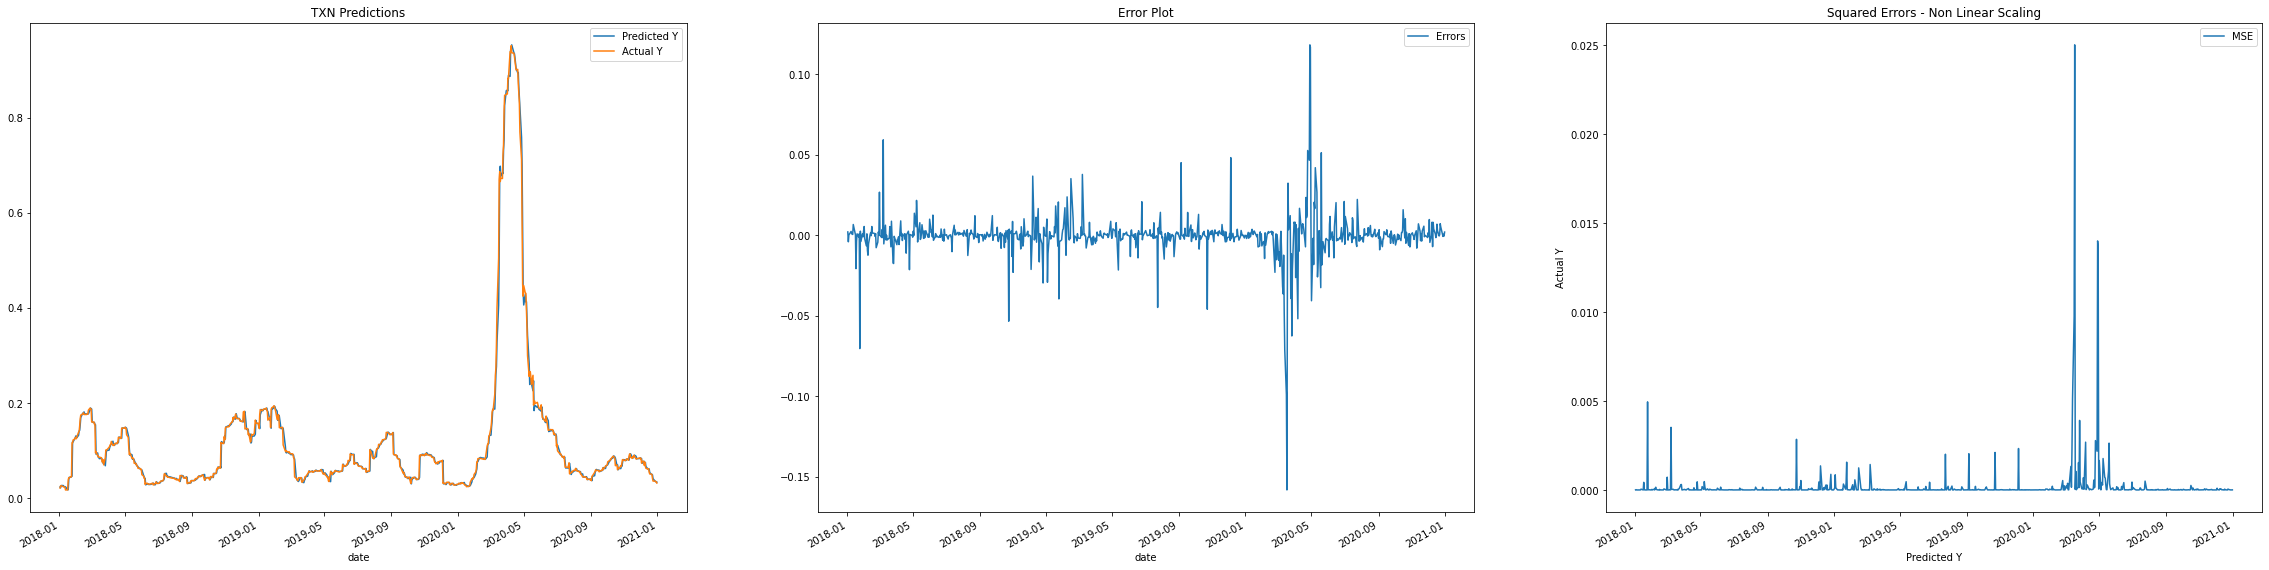

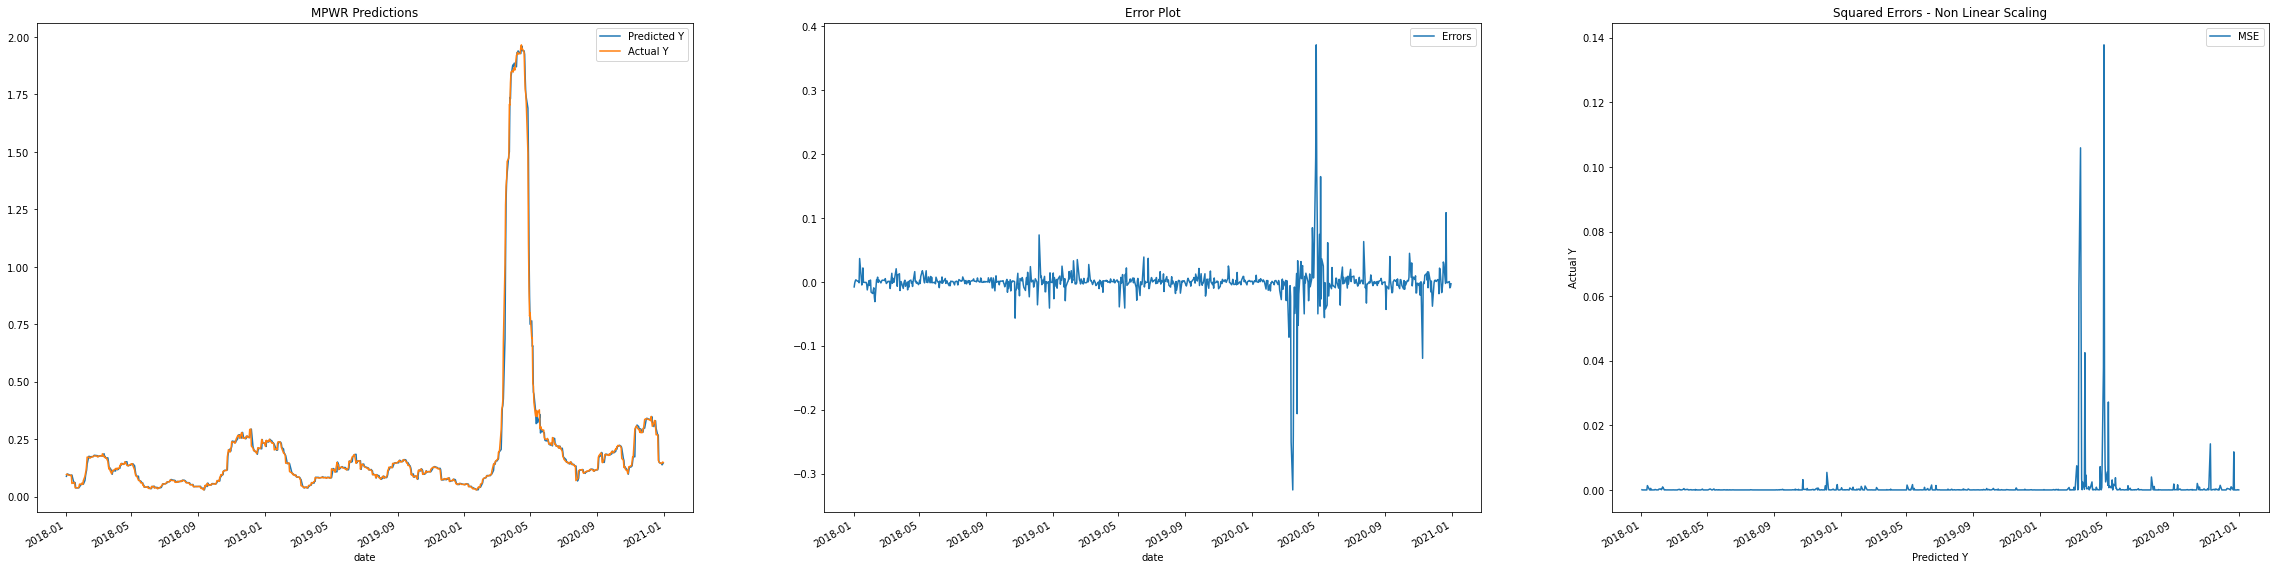

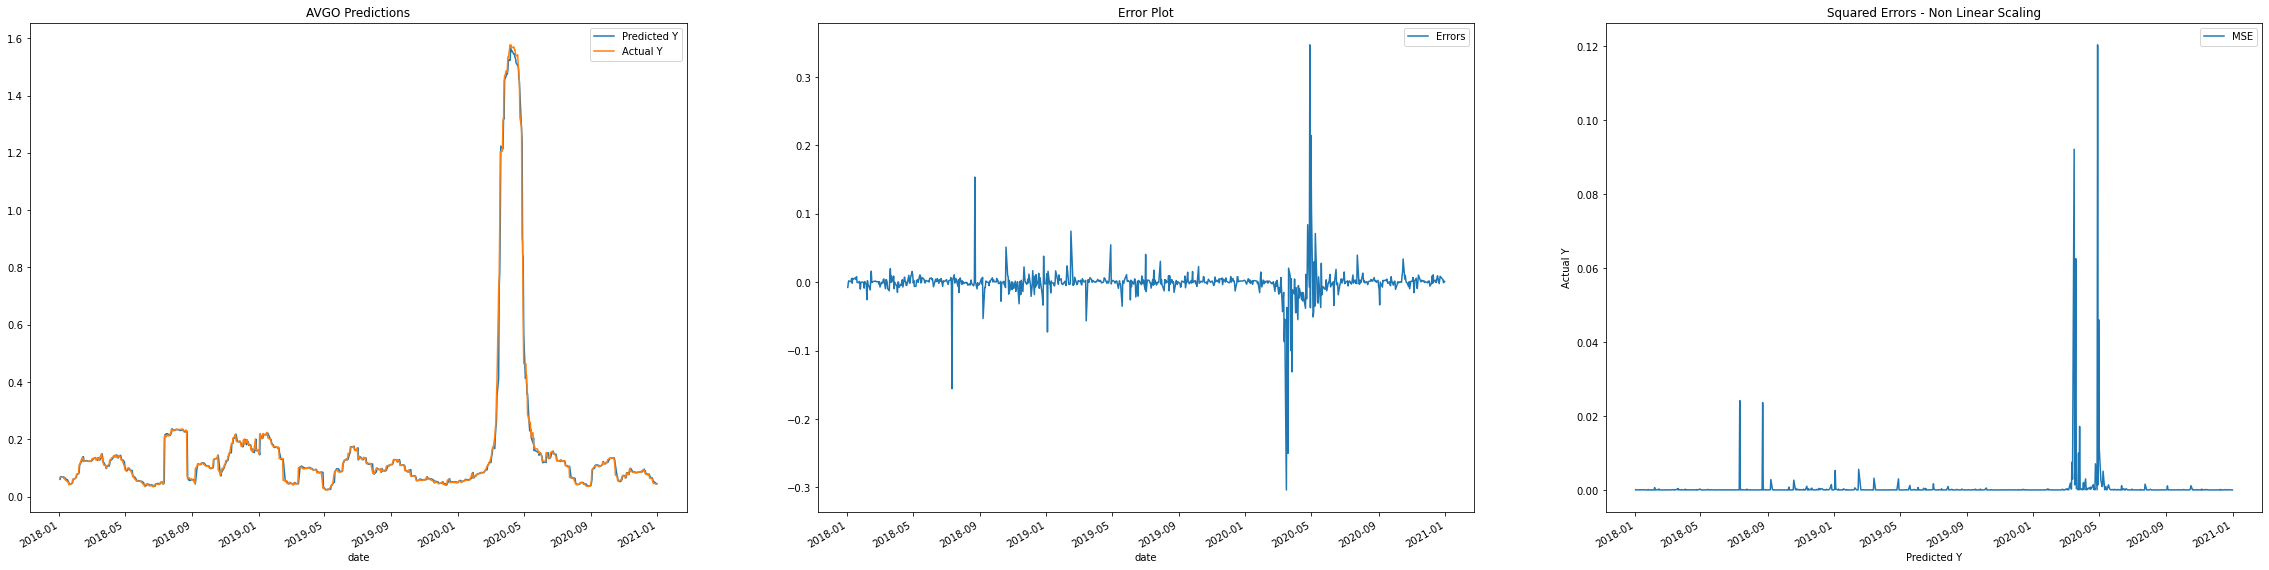

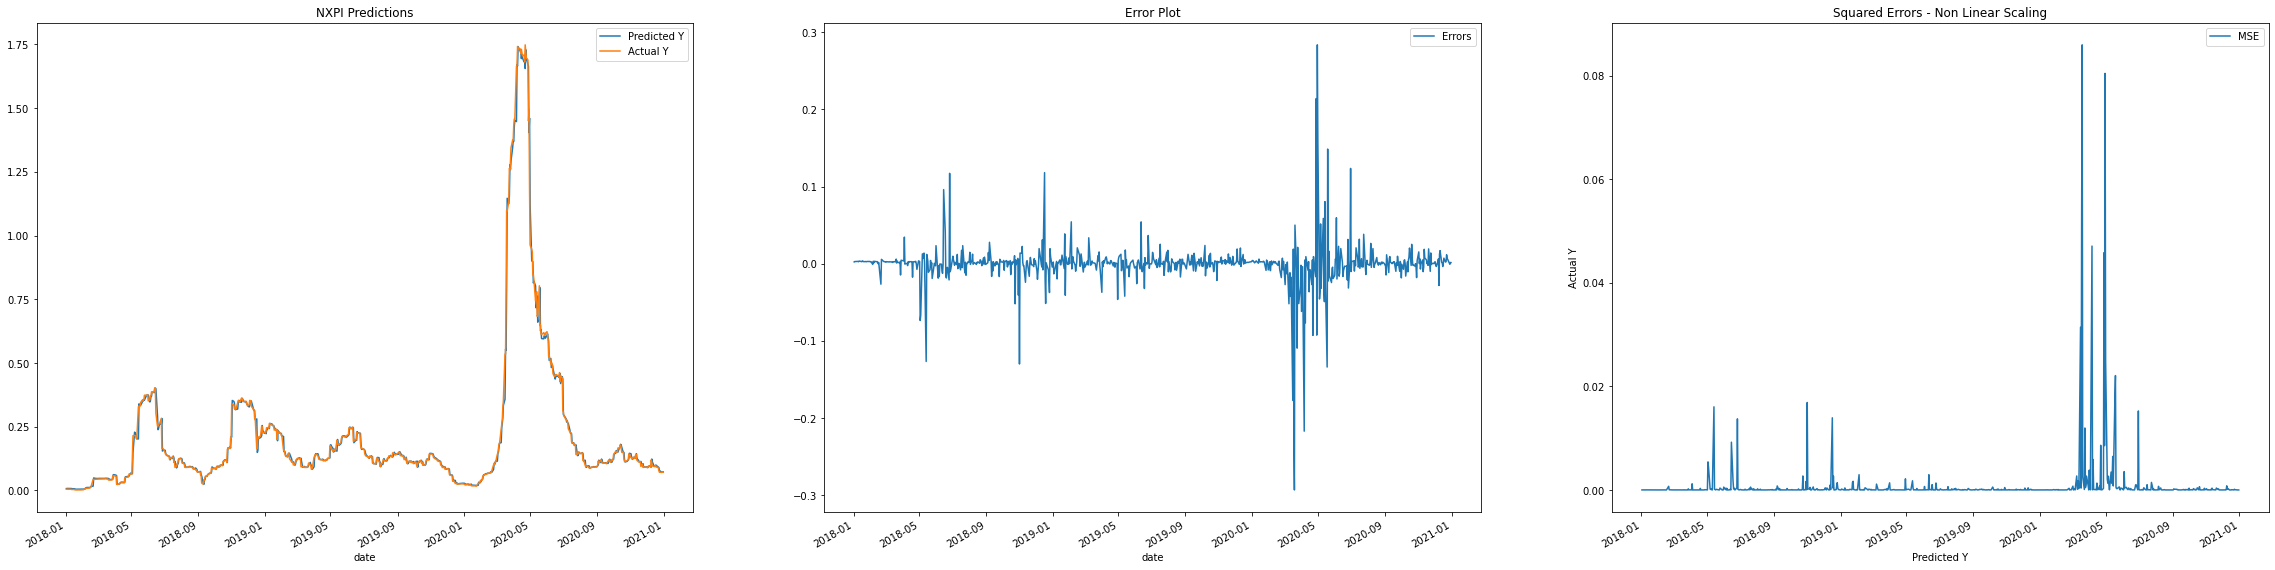

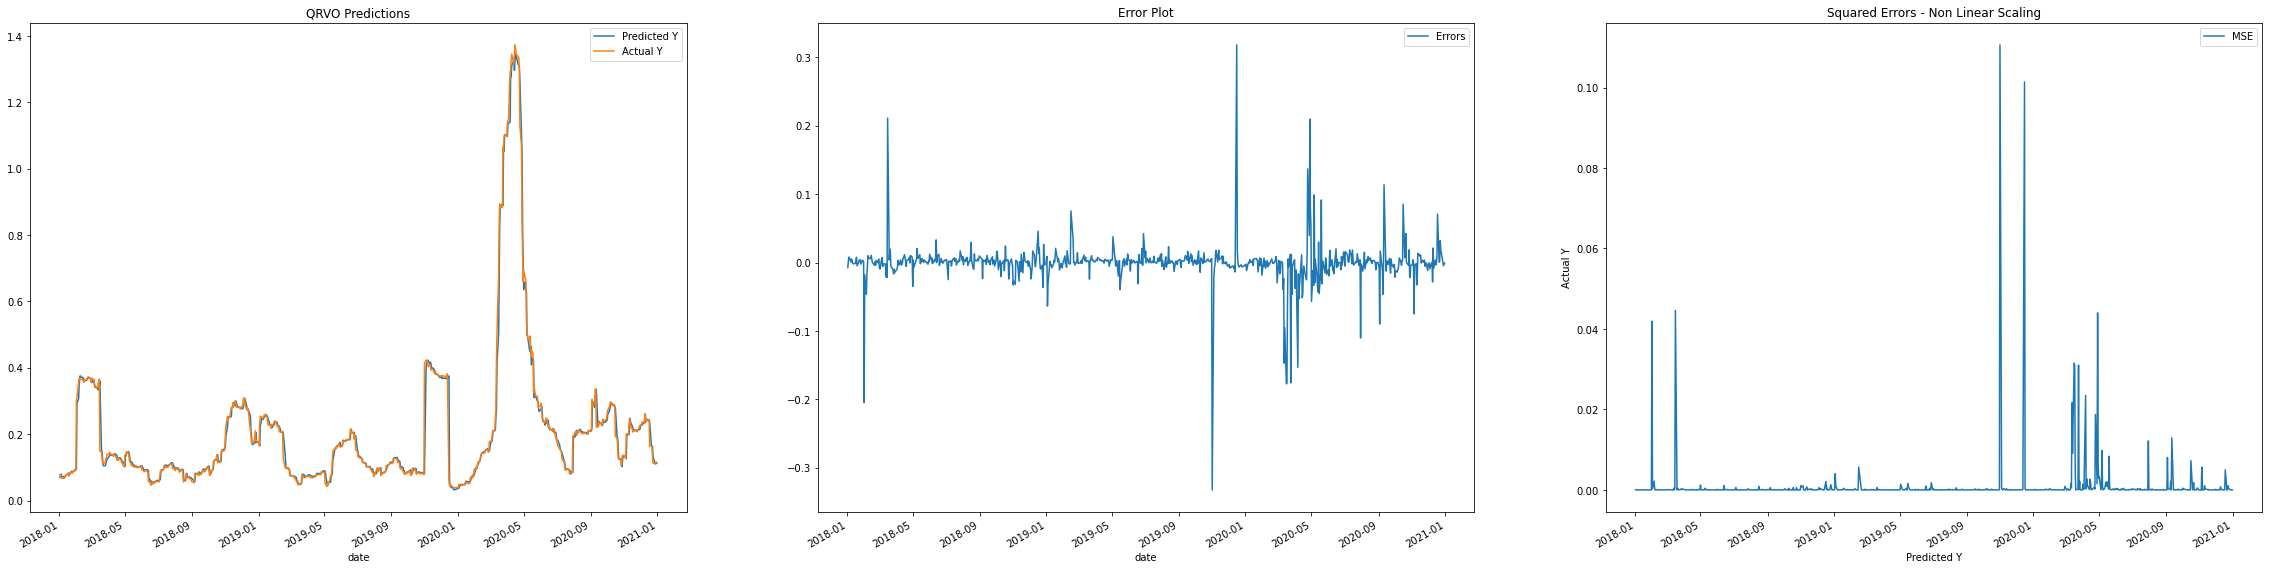

In [37]:
har2=HAR(forwards,futures,transformation="Non-Linear")
har2_results=har2[0]
har2_results

Alpha    1DAY    5DAY   22DAY HAR_Insample R^2 HAR_OOS R^2 Residual  \
AMDSD   0.0463  1.0365 -0.0381 -0.0244           0.9644      0.9812      0.0   
SWKSSD  0.0237  0.9900  0.0139 -0.0188           0.9752      0.9893     -0.0   
ADISD   0.0198  0.9577  0.1071 -0.0750           0.2063      0.9922     -0.0   
INTCSD  0.0126  1.0036  0.0384 -0.0517           0.9892      0.9865     -0.0   
MCHPSD  0.0164  1.0120  0.0111 -0.0355           0.9833      0.9906      0.0   
MUSD    0.0110  1.0283 -0.0221 -0.0088           0.7240      0.9837      0.0   
NVDASD  0.0284  0.9725  0.0428 -0.0333           0.9729      0.9883      0.0   
QCOMSD  0.0220  1.0208  0.0033 -0.0407           0.9796      0.9787     -0.0   
TXNSD   0.0143  1.0055  0.0201 -0.0367           0.9851      0.9921      0.0   
MPWRSD  0.0120  1.0244 -0.0008 -0.0318           0.9892      0.9924     -0.0   
AVGOSD  0.0328  1.0398 -0.0320 -0.0313           0.9692      0.9894      0.0   
NXPISD  0.0190  1.1019 -0.1045 -0.0103           0.9819      0.9926      0.0   
QRVOSD  0.0380  0.9590  0.0617 -0.0460           0.9643      0.9812     -0.0   

       Durbin-Watson       MSE  
AMDSD         1.9129  0.002471  
SWKSSD        2.0221  0.001189  
ADISD         2.0002  0.000775  
INTCSD        1.9711  0.001571  
MCHPSD        1.9774  0.001594  
MUSD          1.9972  0.001457  
NVDASD        1.9788  0.001608  
QCOMSD        1.9655  0.002055  
TXNSD         2.0164  0.000460  
MPWRSD        1.9689  0.001471  
AVGOSD        1.9852  0.001327  
NXPISD        2.0875  0.001491  
QRVOSD        2.0042  0.001882

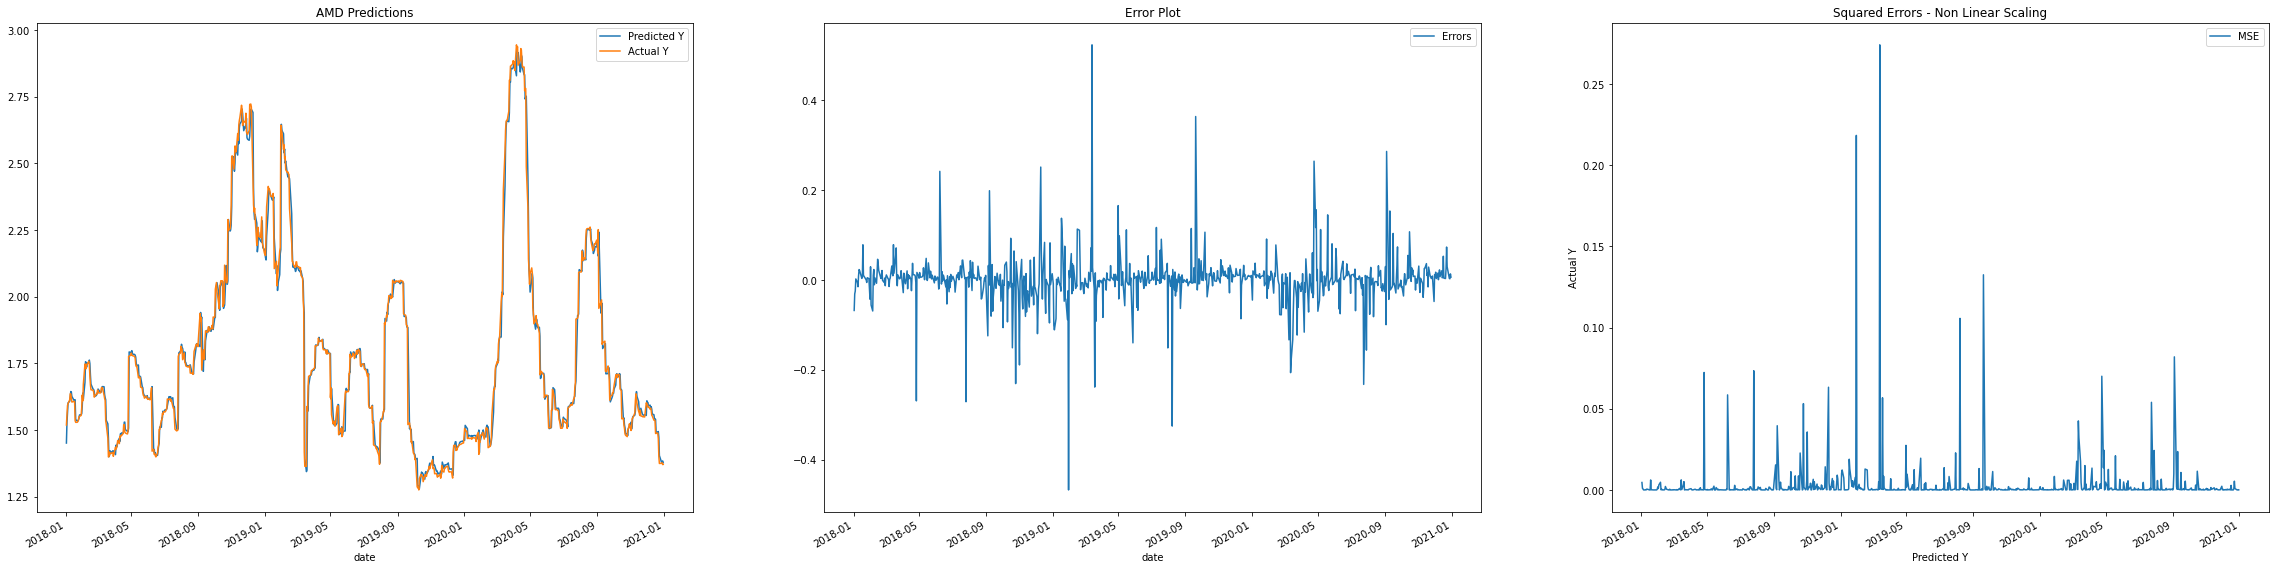

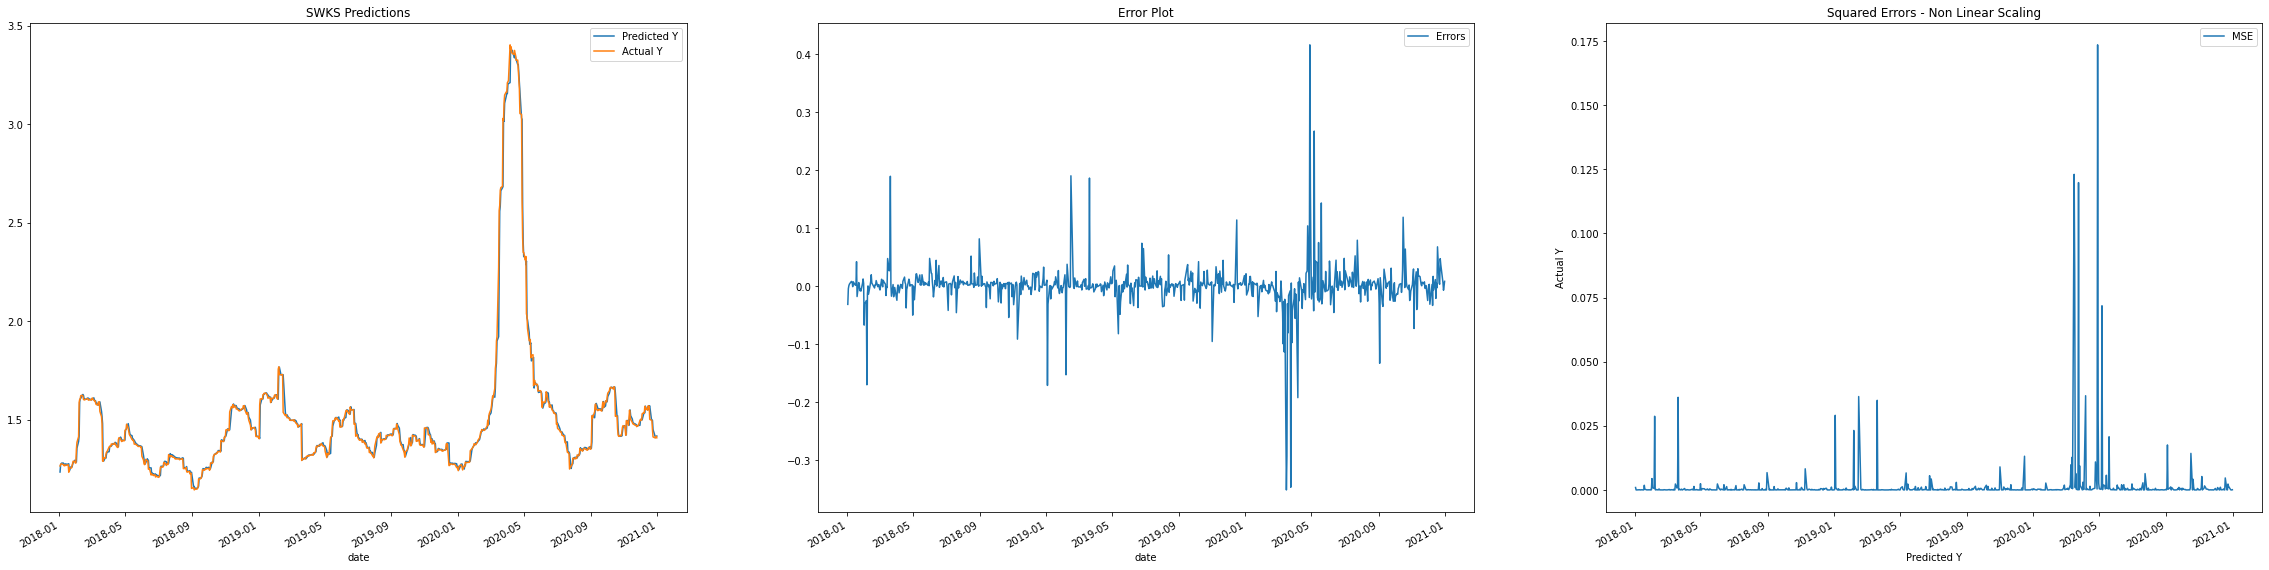

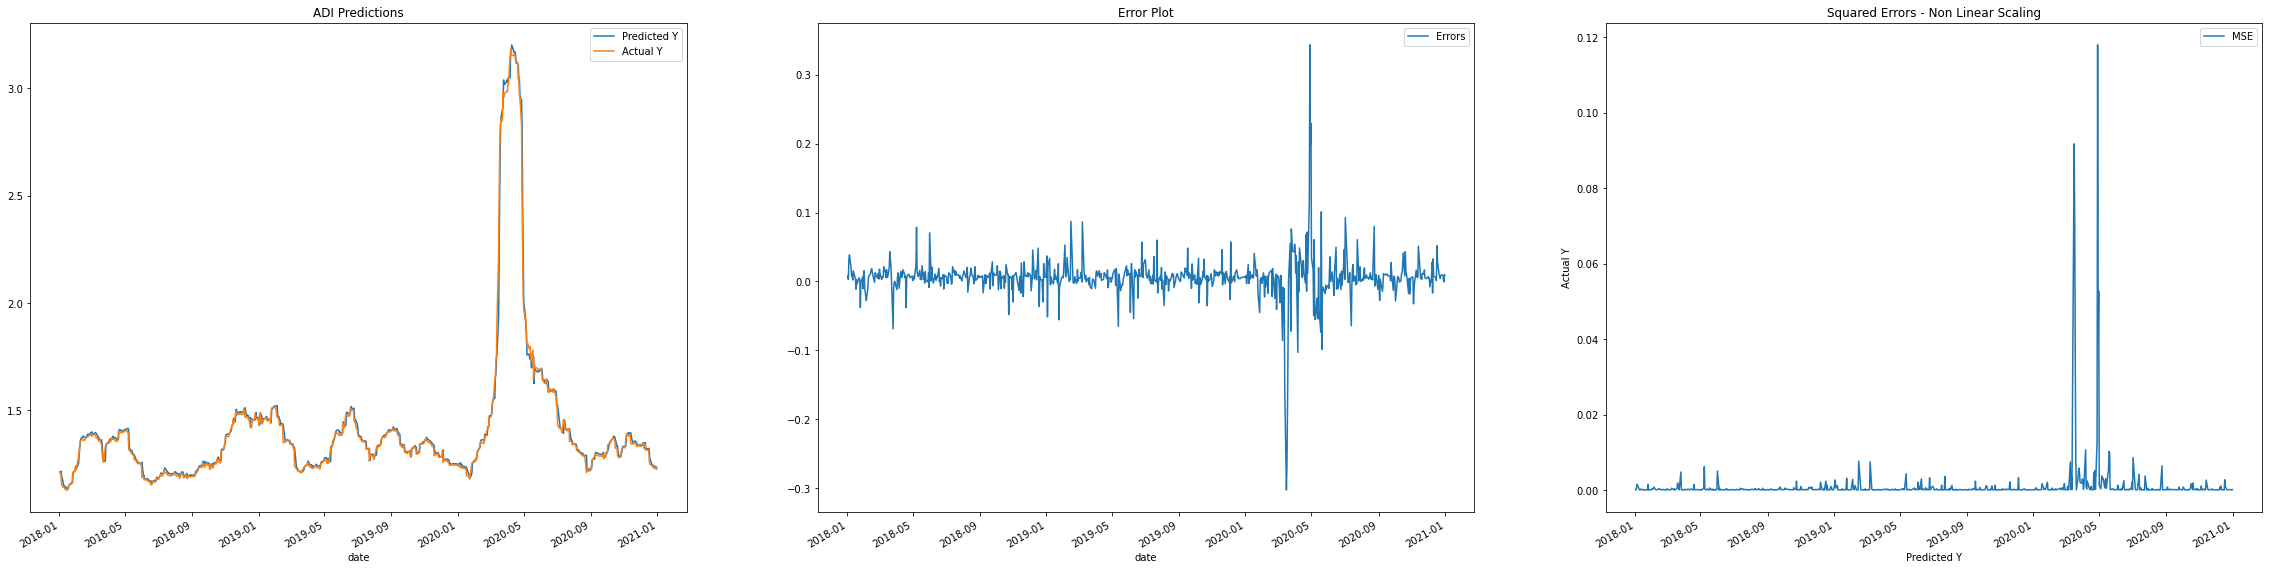

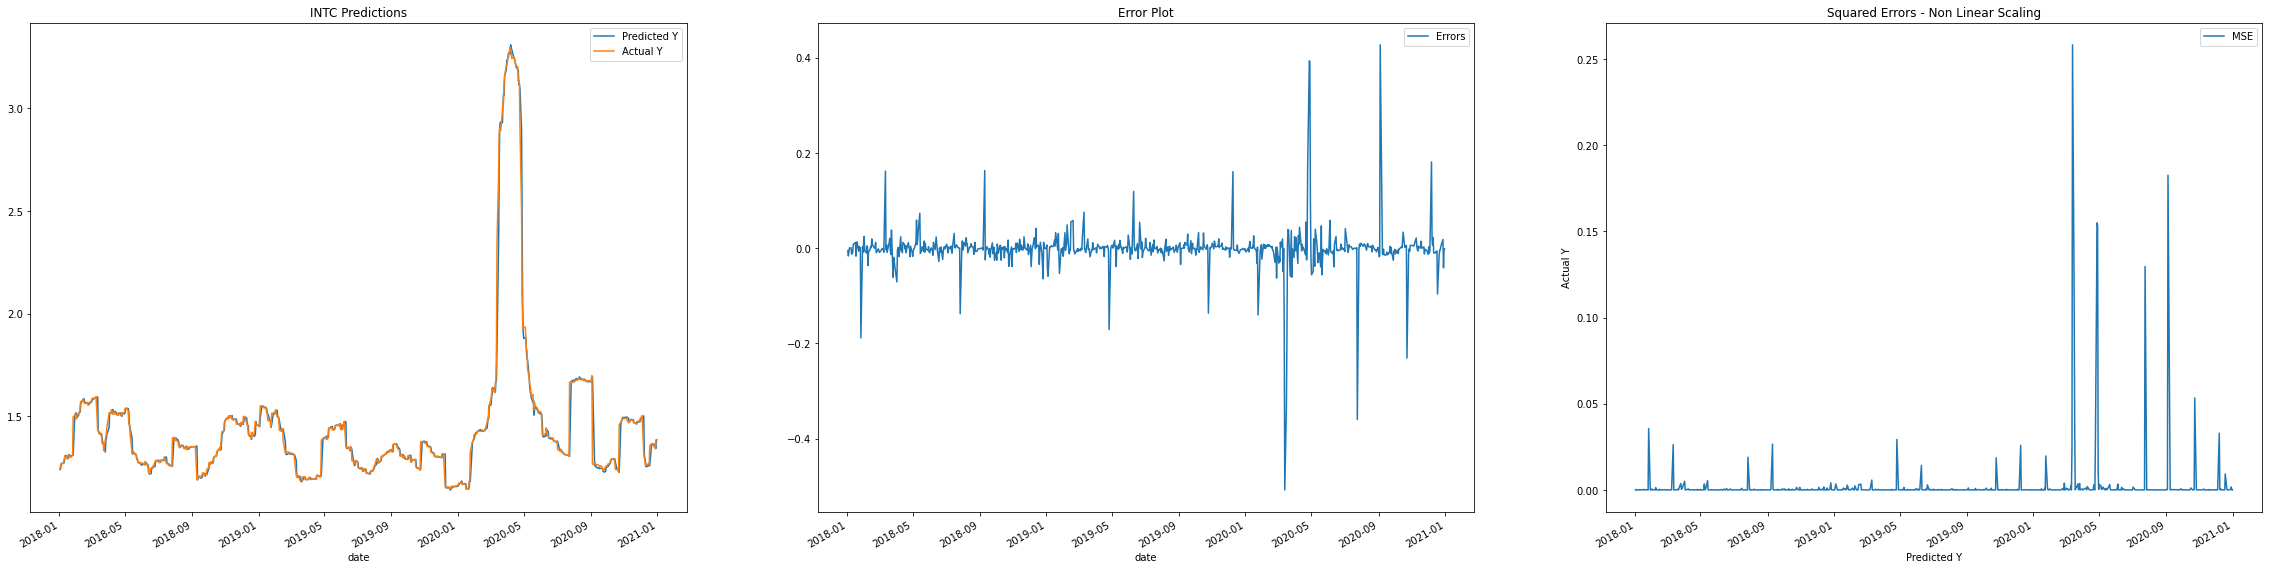

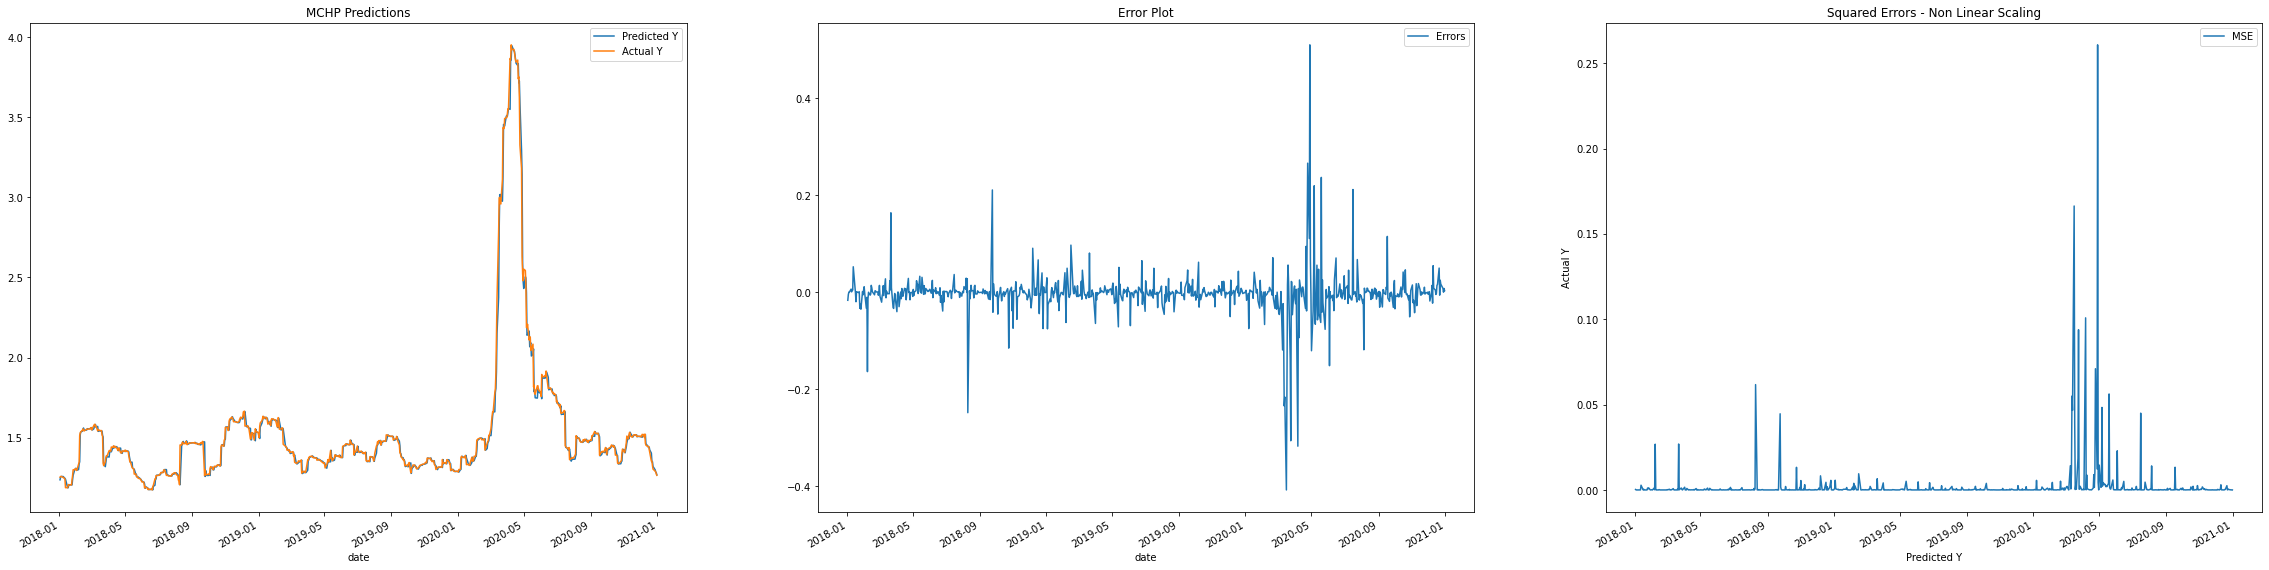

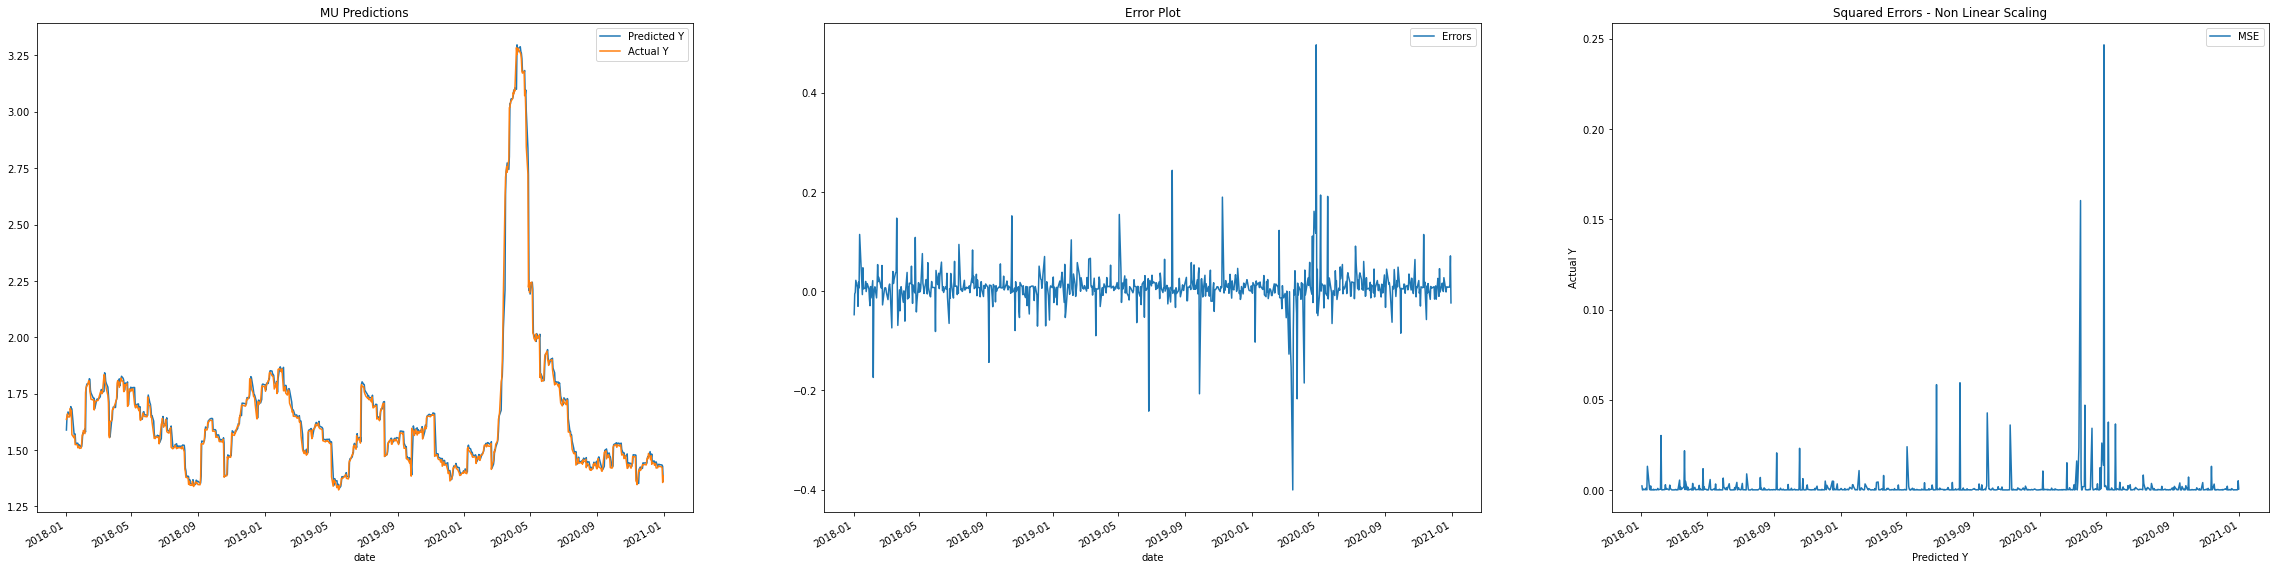

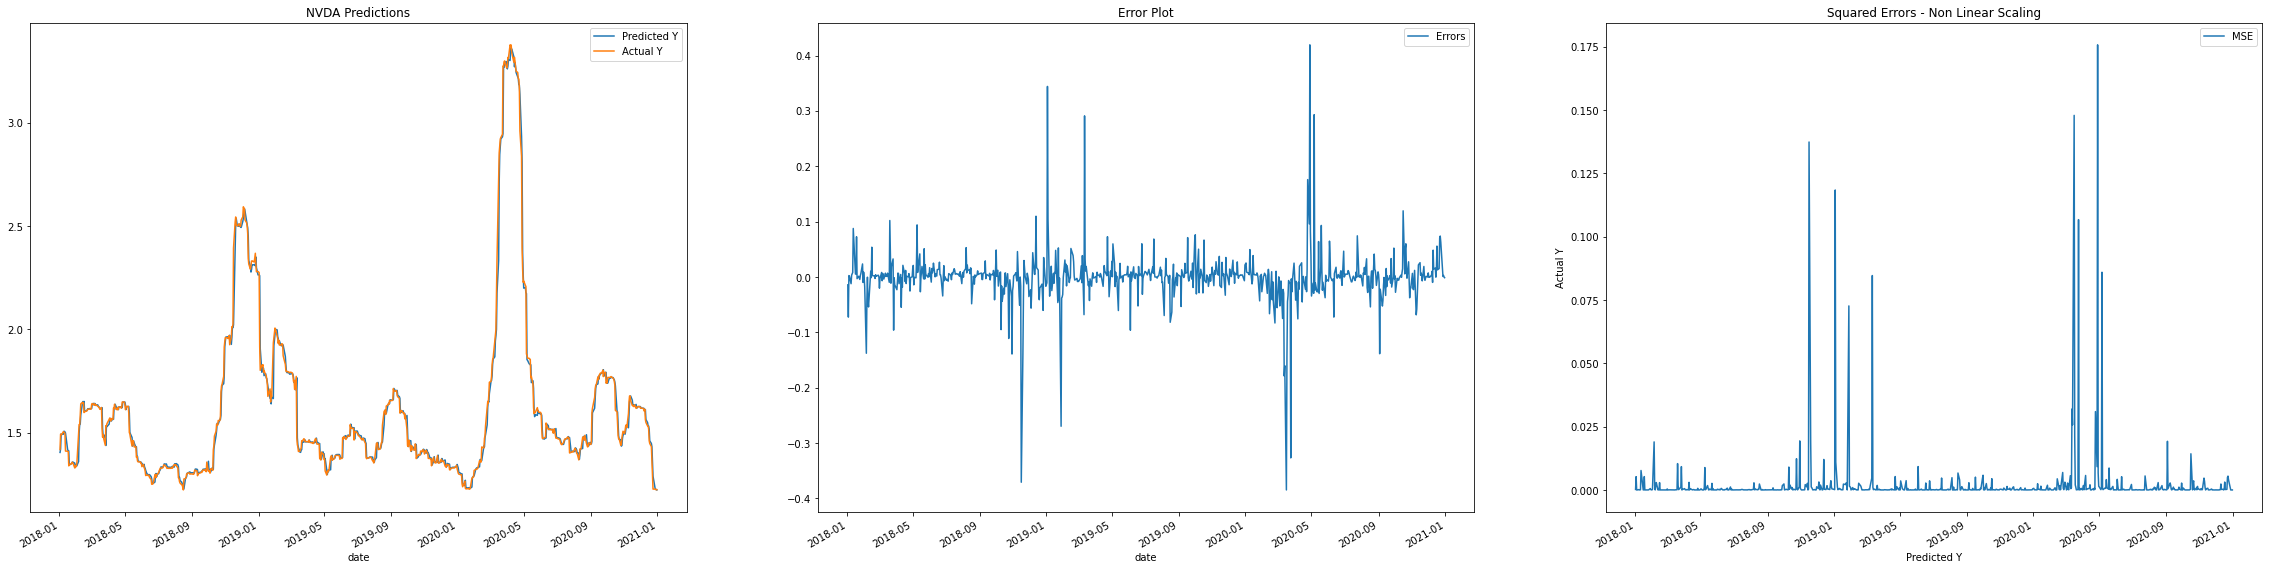

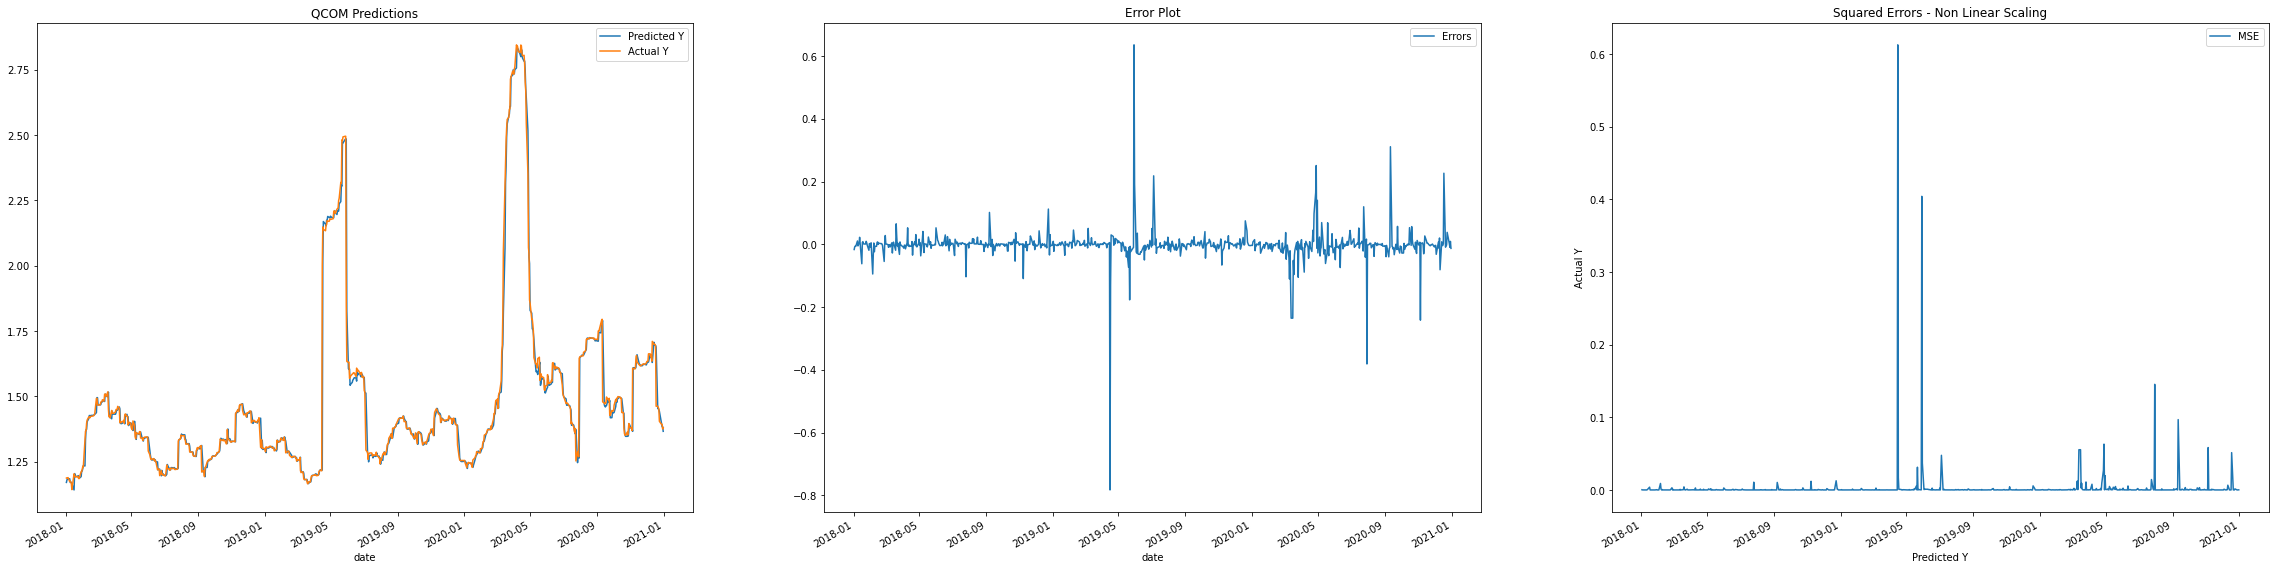

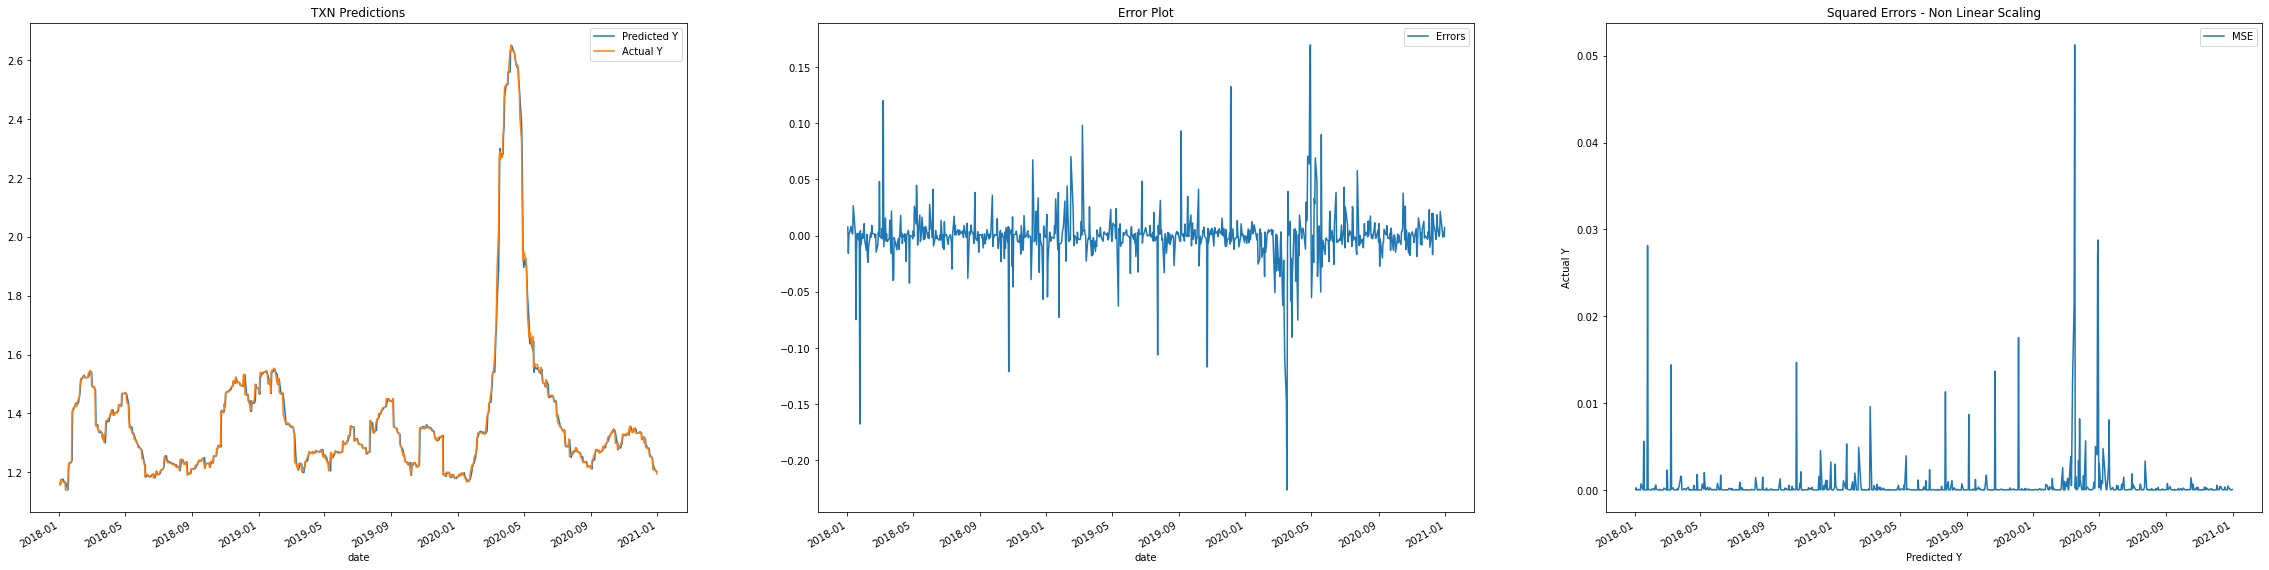

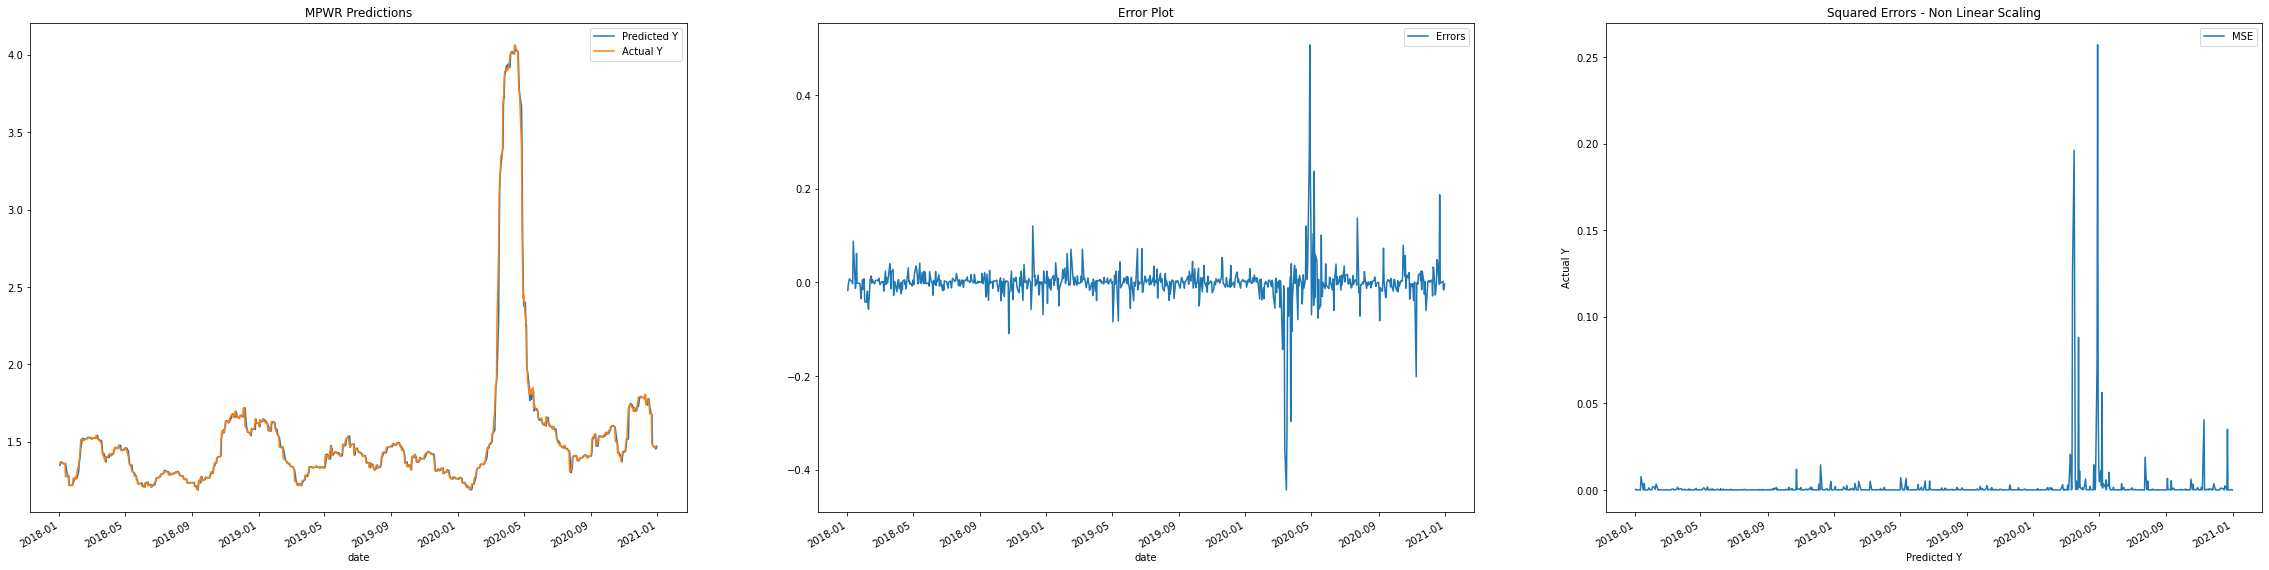

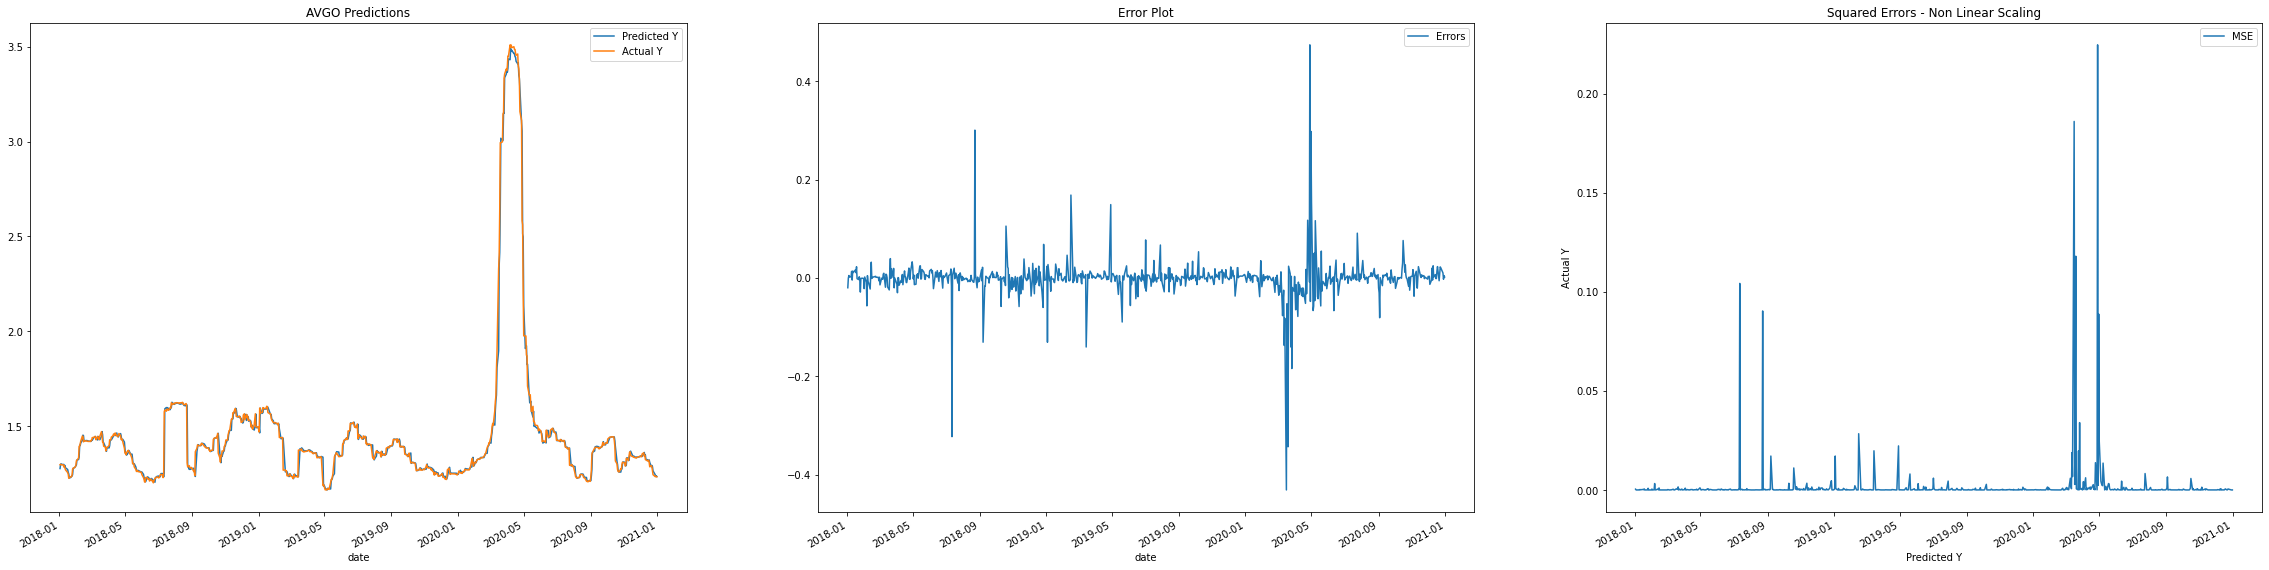

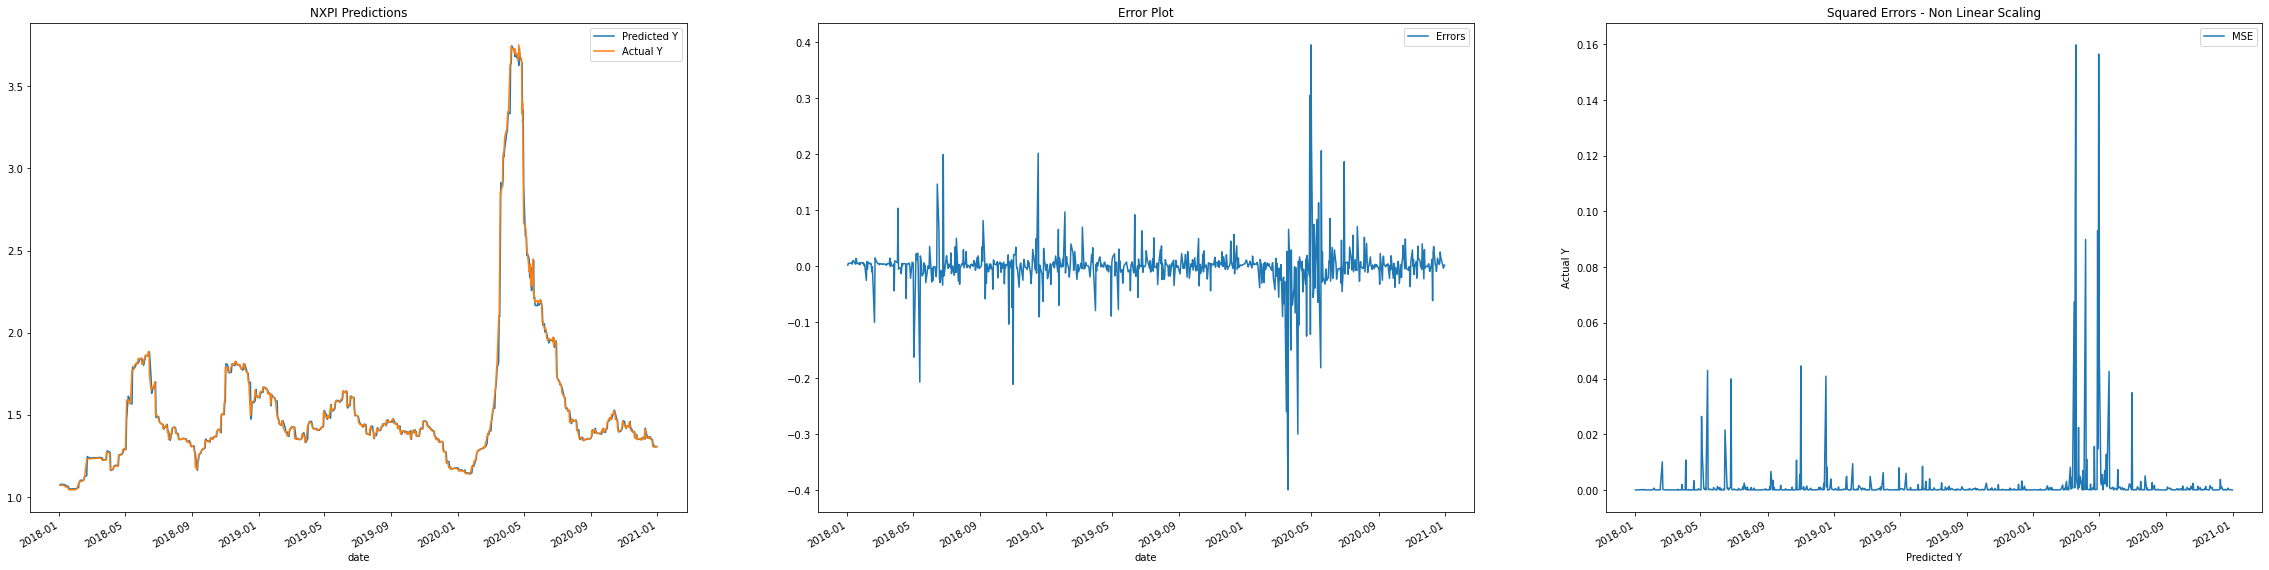

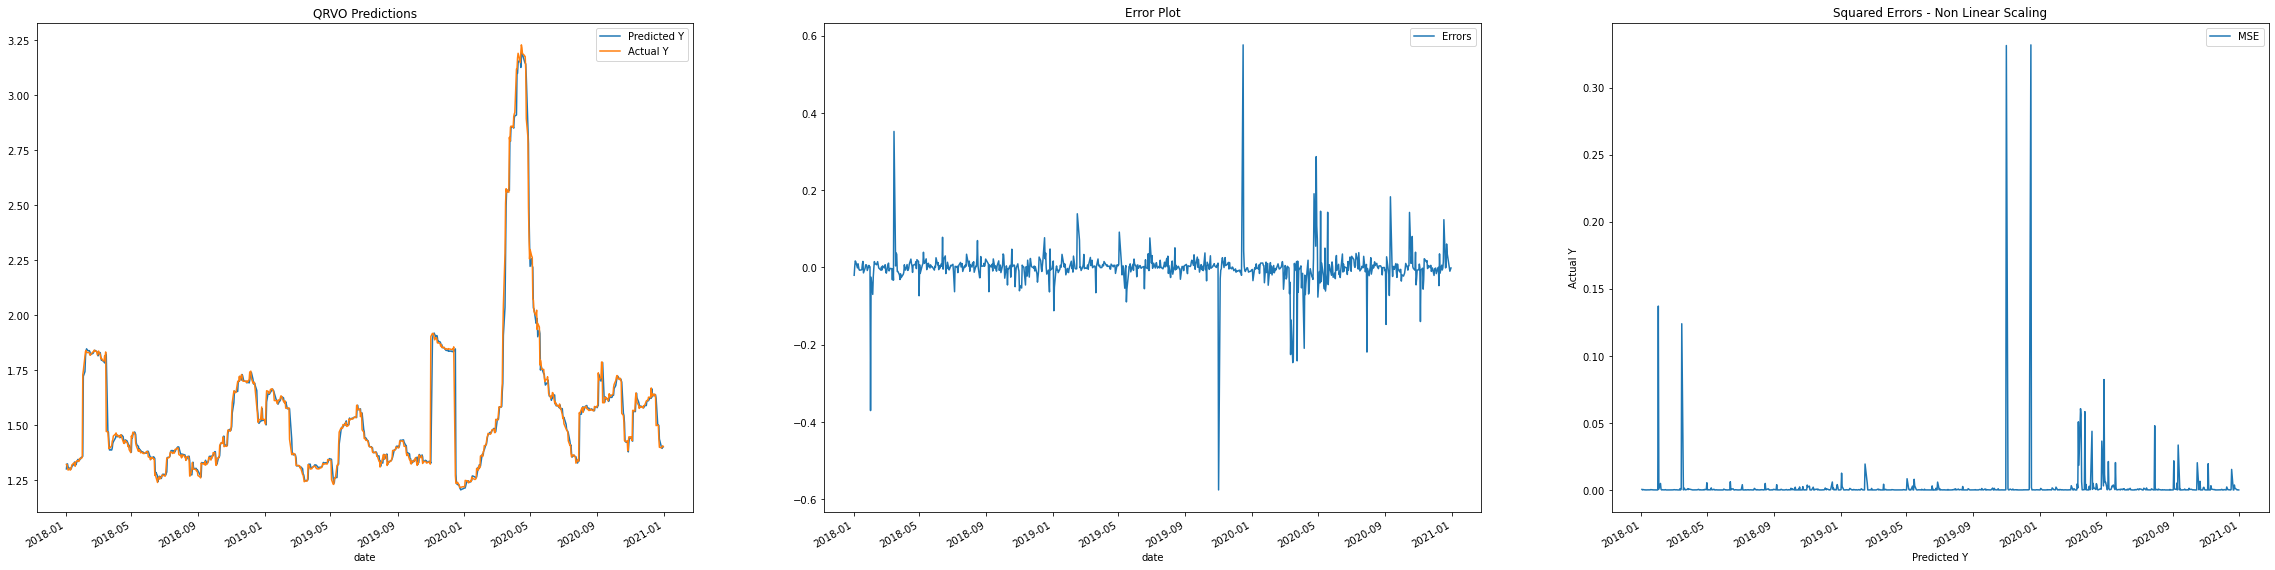

In [38]:
har3=HAR(forwards,futures,transformation="Exponential")
har3_results=har3[0]
har3_results

### HAR_RF

In [15]:
def objective(trial:Trial,train_y,train_x,test_x,test_y,extra=None):
    rf_n_estimators = trial.suggest_int('n_estimators', 1,100,step=2)
    rf_max_features = trial.suggest_categorical('max_features',['sqrt','log2'])
    rf_min_samples_leaf = trial.suggest_int('min_samples_leaf',5,240,step=10)
    rf_max_depth = trial.suggest_int('max_depth',4,15)
    rf_clf = RandomForestRegressor(n_estimators=rf_n_estimators,max_depth=rf_max_depth,min_samples_leaf=rf_min_samples_leaf,max_features=rf_max_features)
    rf_clf.fit(train_x,train_y)
    accuracy = rf_clf.score(test_x,test_y)
    return accuracy

In [16]:
def randomforest_feat_importances(m, df):   
    return pd.DataFrame({'cols':df.columns, 'feat_imp': m.feature_importances_}
                       ).sort_values('feat_imp', ascending=False)

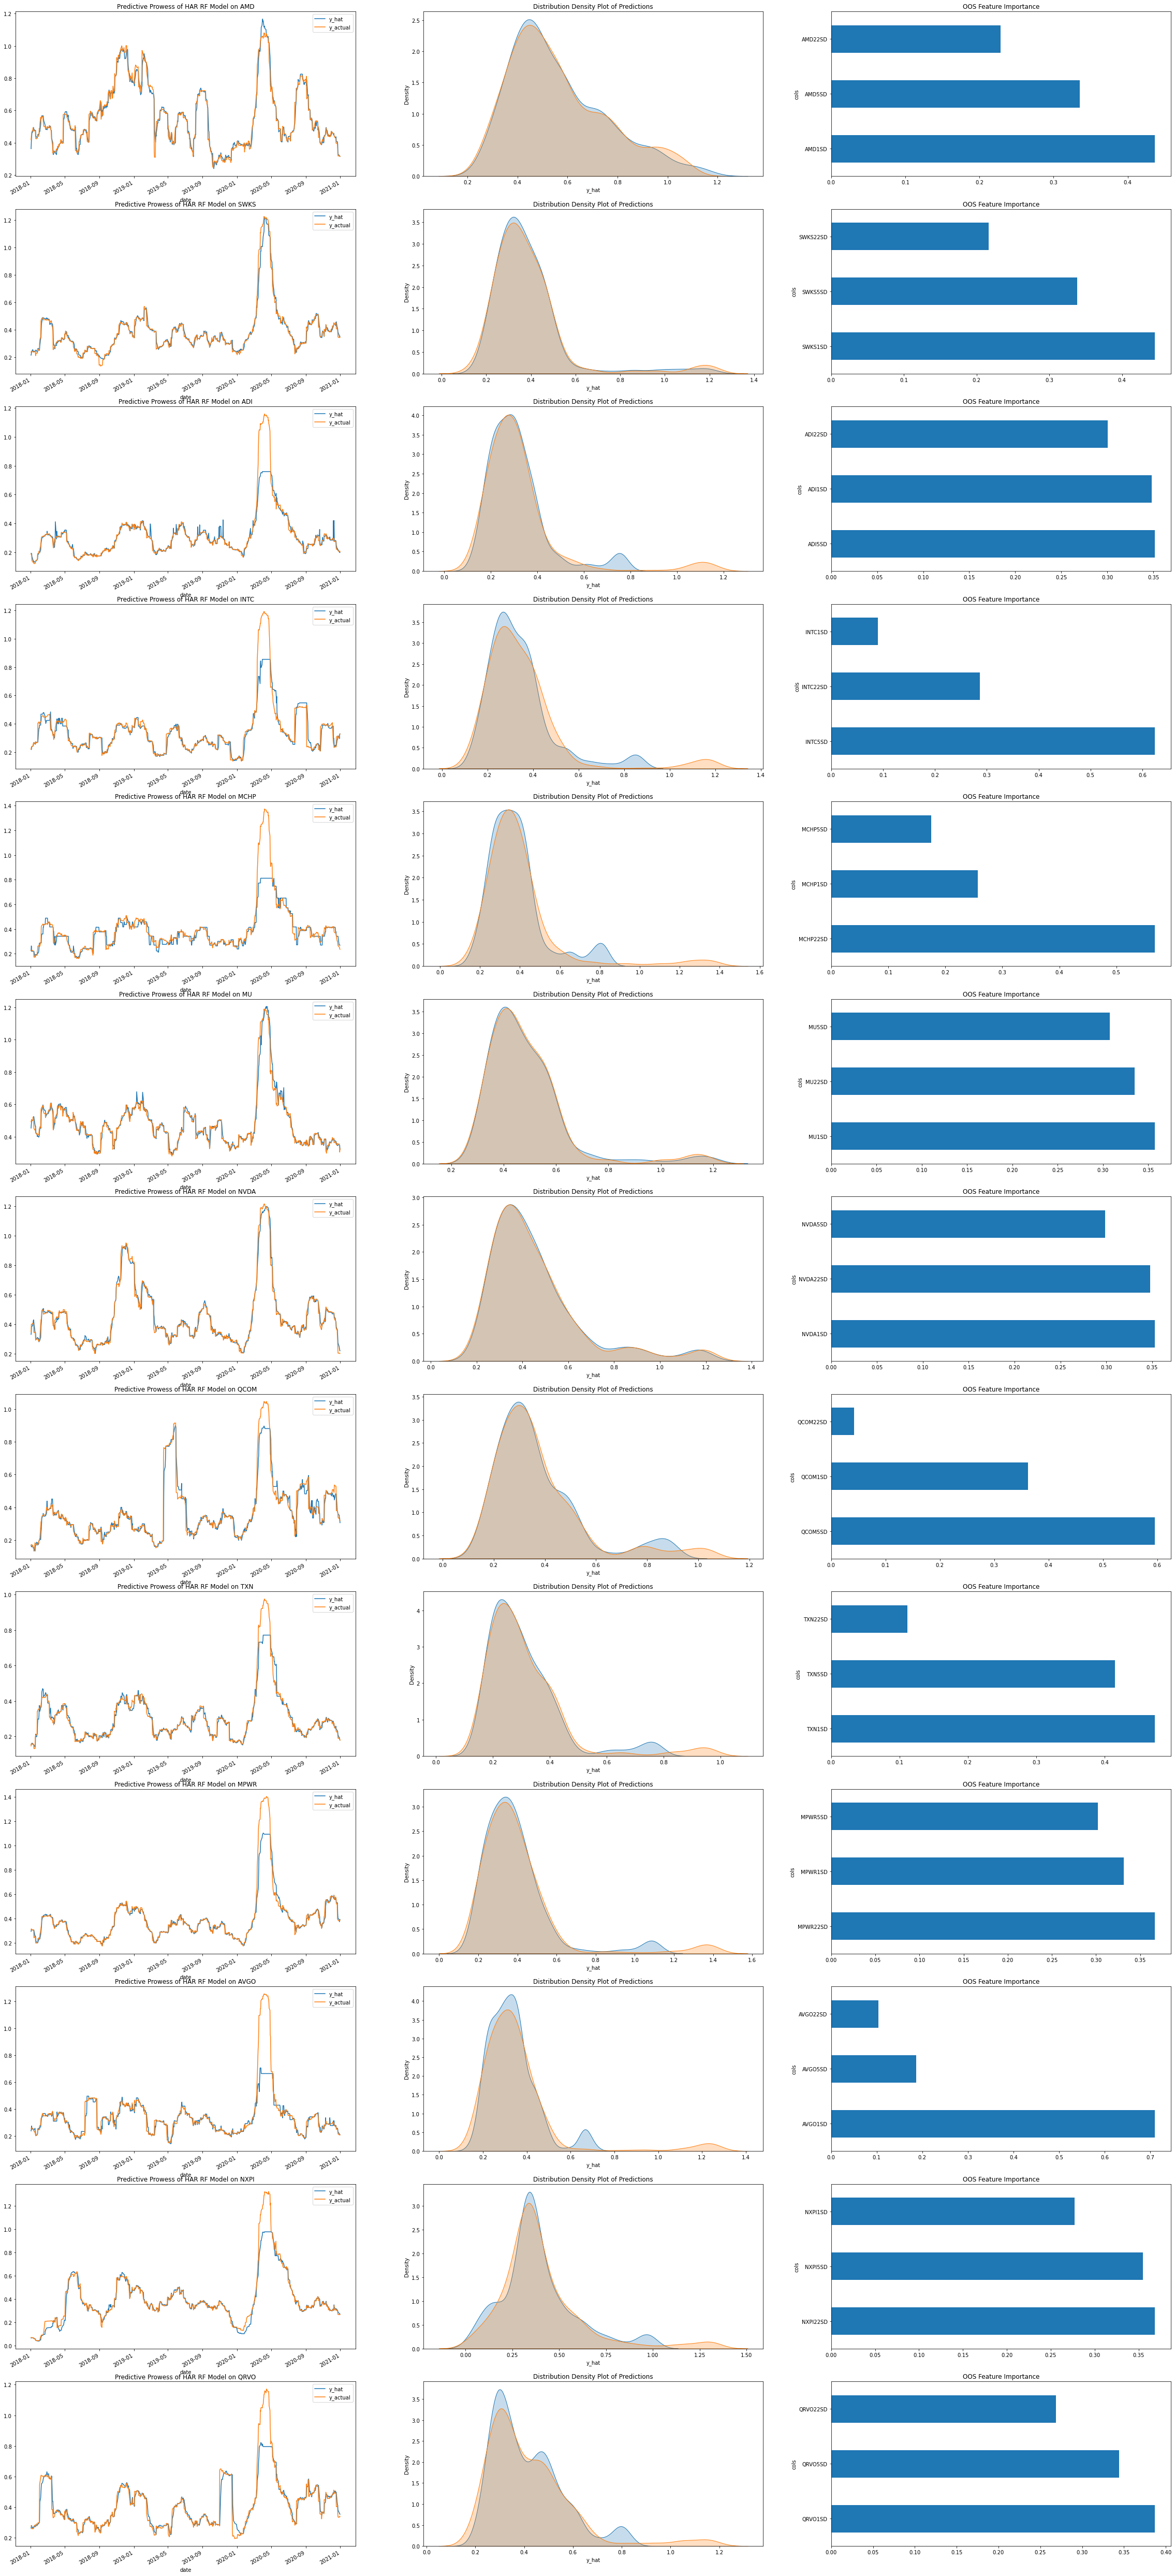

In [17]:
results=pd.DataFrame(index=forwards.columns.unique(),columns=["Insample R^2","OOS R^2"])
model_dict={}
fig, axes = plt.subplots(nrows=len(forwards.columns.unique()), ncols=3,figsize=(40,100))
for i in range(len(forwards.columns.unique())):
    a=forwards.columns.unique()[i]
    mlset_y=futures[a+"SD"]
    mlset_x=futures.filter(regex=a+'1SD|'+a+'5SD|'+a+'22SD').dropna()
    mlset_y=mlset_y[mlset_x.index.values[0]:]   
    training_y=mlset_y[:'2017'].dropna()
    training_x=mlset_x[:'2017'].dropna()
    testing_x=mlset_x['2018':].dropna()
    testing_y=mlset_y['2018':].dropna()
    training_y=training_y.filter(items=training_x.index.values,axis=0)
    training_x=training_x.filter(items=training_y.index.values,axis=0)
    direction="maximize"
    study = optuna.create_study(direction=direction)
    study.optimize(partial(objective,train_y=training_y,train_x=training_x,test_x=testing_x,test_y=testing_y), n_trials=500,n_jobs=-1)
    rf_clf = RandomForestRegressor(**study.best_params)
    rf_clf.fit(training_x,training_y)
    IR=rf_clf.score(testing_x,testing_y)
    OOSR=rf_clf.score(training_x,training_y)
    #Plotting 
    df=pd.Series(rf_clf.predict(testing_x),index=testing_x.index).to_frame('y_hat').join(testing_y)
    df=df.rename(columns={df.columns[1]:'y_actual'})
    #y_hat[y_hat.columns[:2]].plot(ax=axes[0],title=col[:len(col)-2]+" Predictions")
    df.plot(ax=axes[i,0],title="Predictive Prowess of HAR RF Model on "+a)
    sns.kdeplot(df.y_hat,shade=True,ax=axes[i,1],legend=True)
    sns.kdeplot(df[df.columns[1]],shade=True,ax=axes[i,1],legend=True).set(title="Distribution Density Plot of Predictions")
    fi = randomforest_feat_importances(rf_clf,training_x)
    fi.plot('cols', 'feat_imp', 'barh', legend=False,title="OOS Feature Importance",ax=axes[i,2])
    #Results
    results.loc[a,"RF_Insample R^2"]=IR
    results.loc[a,"RF_OOS R^2"]=OOSR
    model_dict[a]=rf_clf 
rf_models=model_dict
rf_results=results.copy()

In [18]:
rf_results

Insample R^2 OOS R^2  RF_Insample R^2  RF_OOS R^2
AMD           NaN     NaN         0.966369    0.974113
SWKS          NaN     NaN         0.968485    0.979951
ADI           NaN     NaN         0.839260    0.861370
INTC          NaN     NaN         0.852981    0.986491
MCHP          NaN     NaN         0.774111    0.962682
MU            NaN     NaN         0.953875    0.963780
NVDA          NaN     NaN         0.978822    0.979382
QCOM          NaN     NaN         0.931726    0.977846
TXN           NaN     NaN         0.927425    0.983103
MPWR          NaN     NaN         0.913217    0.989599
AVGO          NaN     NaN         0.675926    0.958995
NXPI          NaN     NaN         0.921159    0.984821
QRVO          NaN     NaN         0.853830    0.972845

In [19]:

def build_model_custom(base=True,trial=None):
    try:
        n_layers = trial.suggest_int("n_layers", 1, 3)
        layers = []

        in_features = 20

        for i in range(n_layers):

            out_features = trial.suggest_int("n_units_l{}".format(i), 4, 18)

            layers.append(nn.Linear(in_features, out_features))
            layers.append(nn.LeakyReLU())

            in_features = out_features

        layers.append(nn.Linear(in_features, 2))
        layers.append(nn.LeakyReLU())

        return nn.Sequential(*layers)
    except:
        if base==True:
            return MLPRegressor(hidden_layer_sizes=(16,8,4),random_state=1, max_iter=500).fit(trial[0],trial[1])
        else:
            return MLPRegressor(hidden_layer_sizes=(8,4),random_state=1, max_iter=500).fit(trial[0],trial[1])

# Train and evaluate the accuracy of neural network with the addition of pruning mechanism
def train_and_evaluate(param=None, model=None, trial=None):
    
    df = pd.read_csv('Microchip.gz',compression='gzip')
    df = pd.get_dummies(df)
    
    train_data, val_data = train_test_split(df, test_size = 0.2, random_state = 42)
    train, val = train_data, val_data

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=2, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.CrossEntropyLoss()
    optimizer = getattr(optim, param['optimizer'])(model.parameters(), lr= param['learning_rate'])
    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(EPOCHS):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in train_dataloader:

                train_label = train_label.to(device)
                train_input = train_input.to(device)

                output = model(train_input.float())
                
                batch_loss = criterion(output, train_label.long())
                total_loss_train += batch_loss.item()
                
                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
            
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    val_input = val_input.to(device)

                    output = model(val_input.float())

                    batch_loss = criterion(output, val_label.long())
                    total_loss_val += batch_loss.item()
                    
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc
            
            accuracy = total_acc_val/len(val_data)
            
            # Add prune mechanism
            trial.report(accuracy, epoch_num)

            if trial.should_prune():
                raise optuna.exceptions.TrialPruned()

    return 
  
# Define a set of hyperparameter values, build the model, train the model, and evaluate the accuracy
def objective(trial):

     params = {
              'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
              'optimizer': trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "SGD"]),
              }
    
     model = build_model_custom(trial)
     accuracy = train_and_evaluate(params, model, trial)
     return accuracy

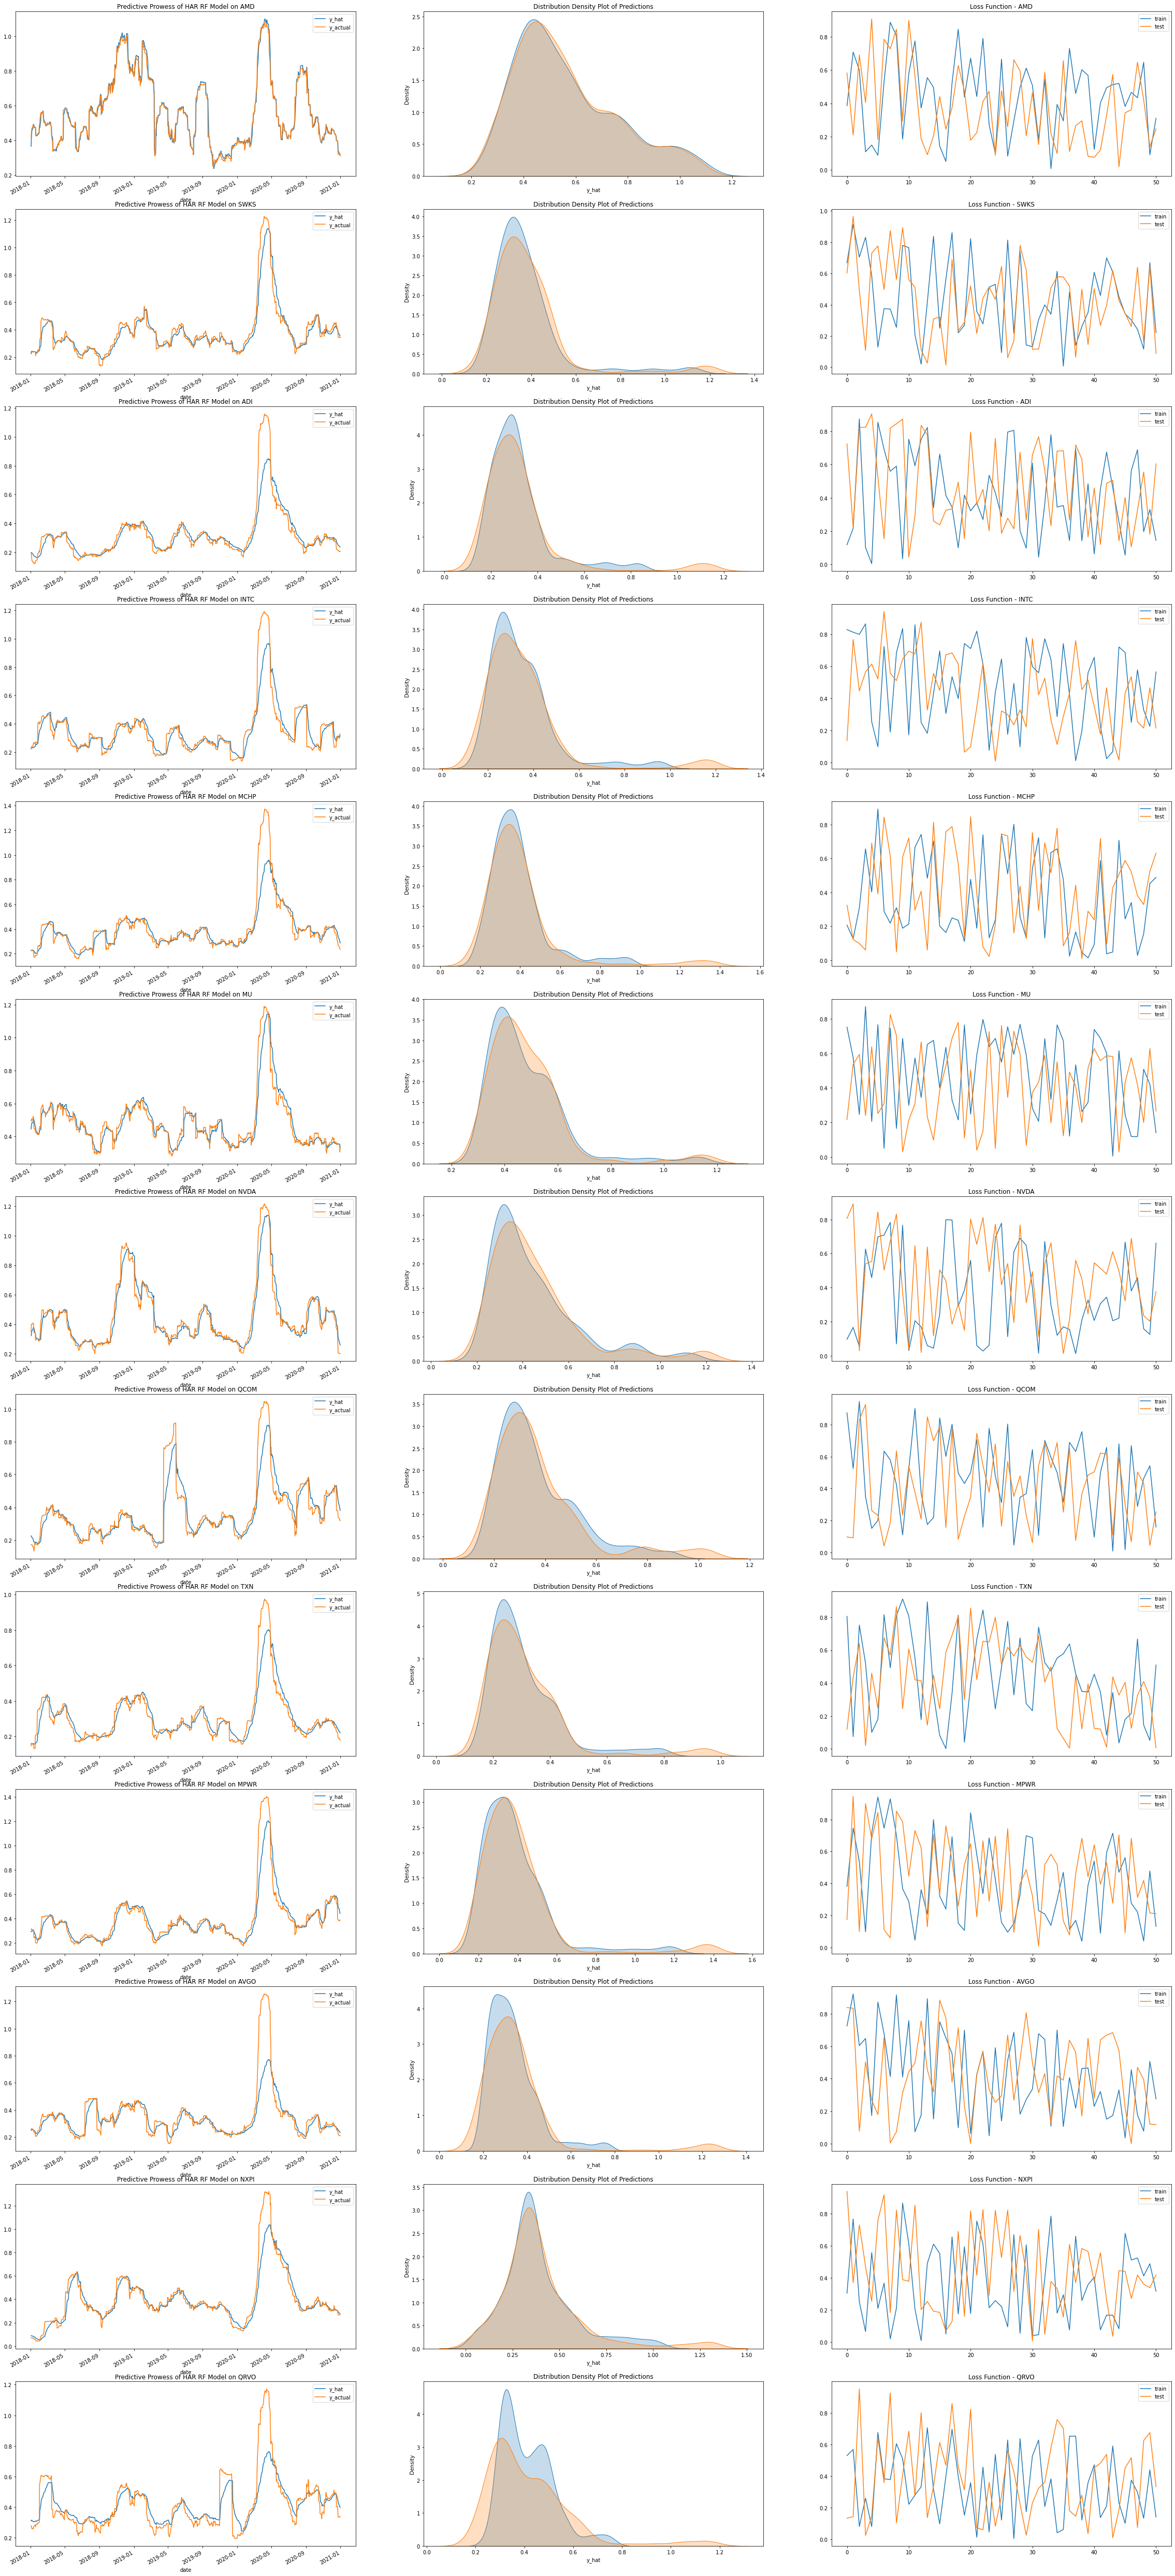

In [21]:
results=pd.DataFrame(index=forwards.columns.unique(),columns=["NN_Insample R^2","NN_OOS R^2"])
nn_models={}
fig, axes = plt.subplots(nrows=len(forwards.columns.unique()), ncols=3,figsize=(40,100))
for i in range(len(forwards.columns.unique())):
    a=forwards.columns.unique()[i]
    mlset_y=futures[a+"SD"]
    mlset_x=futures.filter(regex=a+'1SD|'+a+'5SD|'+a+'22SD').dropna()
    mlset_y=mlset_y[mlset_x.index.values[0]:]   
    training_y=mlset_y[:'2017'].dropna()
    training_x=mlset_x[:'2017'].dropna()
    testing_x=mlset_x['2018':].dropna()
    testing_y=mlset_y['2018':].dropna()
    training_y=training_y.filter(items=training_x.index.values,axis=0)
    training_x=training_x.filter(items=training_y.index.values,axis=0)
    model_base=build_model_custom(True,(training_x,training_y))
    isscore=model_base.score(training_x,training_y)
    oosscore=model_base.score(testing_x,testing_y)
    results.loc[a,"NN_Insample R^2"]=isscore
    results.loc[a,"NN_OOS R^2"]=oosscore
    nn_models[a]=model_base
    df=pd.Series(model_base.predict(testing_x),index=testing_x.index).to_frame('y_hat').join(testing_y)
    df=df.rename(columns={df.columns[1]:'y_actual'})
    #y_hat[y_hat.columns[:2]].plot(ax=axes[0],title=col[:len(col)-2]+" Predictions")
    df.plot(ax=axes[i,0],title="Predictive Prowess of HAR RF Model on "+a)
    sns.kdeplot(df.y_hat,shade=True,ax=axes[i,1],legend=True)
    sns.kdeplot(df[df.columns[1]],shade=True,ax=axes[i,1],legend=True).set(title="Distribution Density Plot of Predictions")
    loss_function().plot(ax=axes[i,2],title="Loss Function - "+a)
nn_results=results.copy()

# Model Selection

In [157]:
rf=rf_results.iloc[:,2:]
nn=nn_results
x1=har1_results[har1_results.columns[4:6]]
x1.rename(columns={x1.columns[0][0]:'Linear_'+x1.columns[0][0],x1.columns[1][0]:'Linear_'+x1.columns[1][0]},inplace=True)
x1.index=rf.index
x2=har2_results[har2_results.columns[4:6]]
x2.rename(columns={x2.columns[0][0]:'Non-Linear_'+x2.columns[0][0],x2.columns[1][0]:'Non-Linear_'+x2.columns[1][0]},inplace=True)
x2.index=rf.index
x3=har3_results[har3_results.columns[4:6]]
x3.rename(columns={x3.columns[0][0]:'Exponential_'+x3.columns[0][0],x3.columns[1][0]:'Exponential_'+x3.columns[1][0]},inplace=True)
x3.index=rf.index
all_results=x1.join([x2,x3,rf,nn])
final_models=pd.Series(all_results.filter(regex="OOS").T.astype(float).idxmax()).apply(lambda x: str.replace(x[0],"_OOS R^2","") if isinstance(x,tuple) else str.replace(x,"_OOS R^2",""))

In [158]:
final_models

AMD                  NN
SWKS     Non-Linear_HAR
ADI          Linear_HAR
INTC     Non-Linear_HAR
MCHP     Non-Linear_HAR
MU       Non-Linear_HAR
NVDA    Exponential_HAR
QCOM    Exponential_HAR
TXN      Non-Linear_HAR
MPWR    Exponential_HAR
AVGO                 RF
NXPI                 RF
QRVO     Non-Linear_HAR
dtype: object

## Portfolio Construction

In [23]:
def portfolio_variance(dataframe,weighting="equal"):
    if weighting=="equal":
        weights=np.array([round(1/len(dataframe),5) for i in range(len(dataframe))])
        return np.dot(weights.T,np.dot(dataframe.cov(),weights))
    else:
        weights=weighting
        return np.dot(weights.T,np.dot(dataframe.cov(),weights))